#### Shashank Kumbhare
email: shashankkumbhare8@gmail.com  
phone: (682) 812-9211  
[LinkedIn](https://www.linkedin.com/in/shashank-kumbhare/)  

[View this project on GitHub](https://github.com/ShashankKumbhare/traffic-light-classifier)  
[Link to the implemented package code](https://github.com/ShashankKumbhare/traffic-light-classifier/tree/main/traffic_light_classifier)

In [1]:
# Installing package from GitHub >>
# !pip install git+https://github.com/ShashankKumbhare/traffic-light-classifier.git#egg=traffic-light-classifier

In [2]:
# 
import traffic_light_classifier as tlc
import random
tlc.__version__


Importing package 'traffic_light_classifier'...
  + Adding module 'helpers'...
['.git', '.gitignore', '.ipynb_checkpoints', 'auxil', 'build', 'dist', 'images', 'LICENSE.md', 'README.md', 'setup.py', 'traffic_light_classifier', 'traffic_light_classifier.egg-info', 'Traffic_Light_Classifier.ipynb', 'traffic_light_images']
  - Done!
  + Adding module 'tests'...
  - Done!
  + Adding module 'plots'...
  - Done!
  + Adding module 'modify_images'...
  - Done!
  + Adding module 'extract_feature'...
  - Done!
  + Adding module 'statistics'...
  - Done!
  + Adding module 'datasets'...
  - Done!
  + Adding module 'Model'...
  - Done!
Package 'traffic_light_classifier' imported sucessfully !!



'1.0.0'

In [3]:
model = tlc.Model()

# <span style="color:orange"> Model Compilation </span>


Compilation in progress... Please wait !!


### <span style='color: orange;'>Compilation Stage 1: Getting average image for red, yellow and green images</span>

hsv image of average image


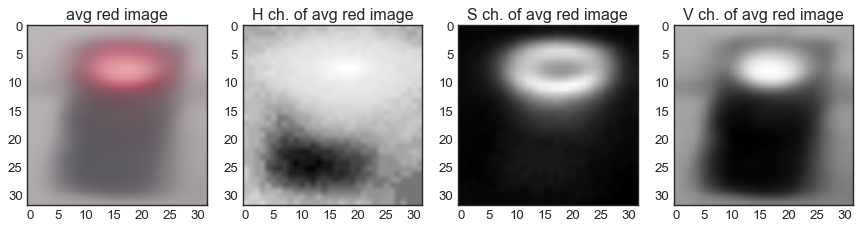

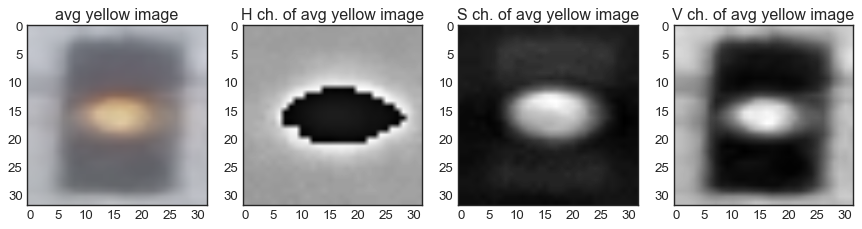

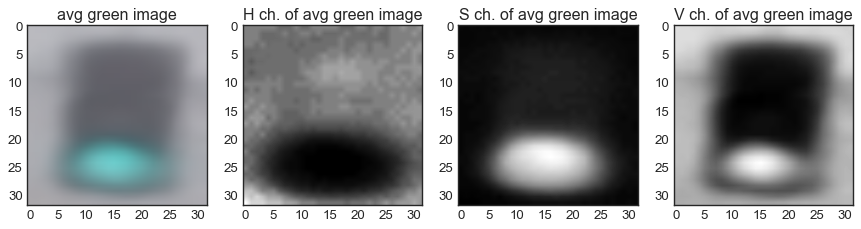

<span style='color: skyblue;'>Done!</span>

### <span style='color: orange;'>Compilation Stage 2: Getting region of high saturation in average red, yellow & green images</span>

Region of high saturation in average red, yellow & green images


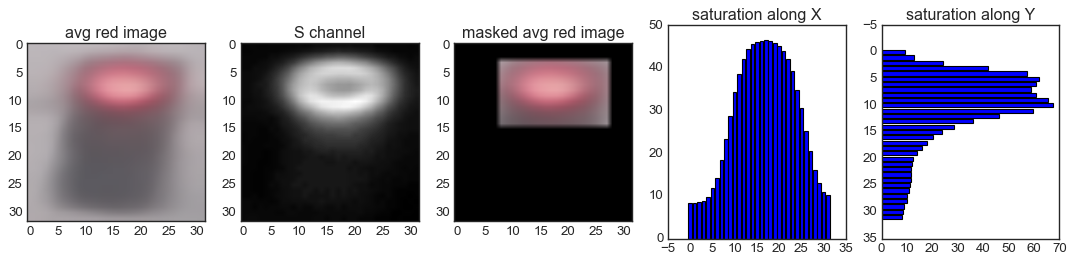

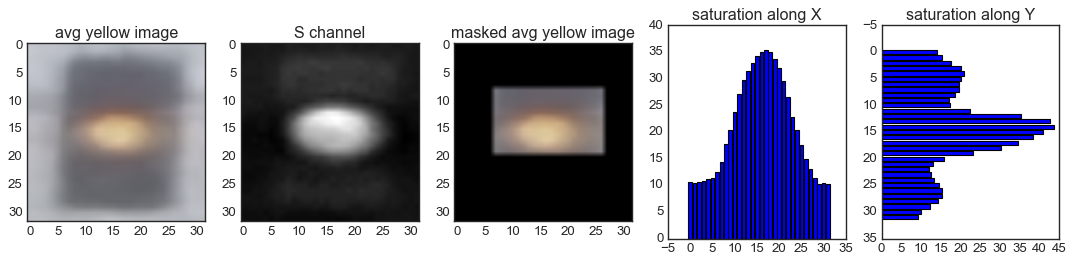

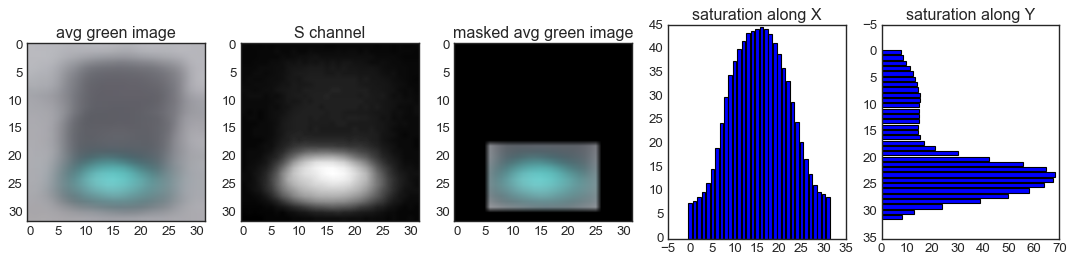

Approximate region of high Saturation red    images: X = (8, 28), Y = (3, 15)
Approximate region of high Saturation yellow images: X = (7, 27), Y = (8, 20)
Approximate region of high Saturation green  images: X = (6, 26), Y = (18, 30)


<span style='color: skyblue;'>Done!</span>

### <span style='color: orange;'>Compilation Stage 3: Cropping all training images at their respective color's average image's high saturation region</span>

A few cropped lights:


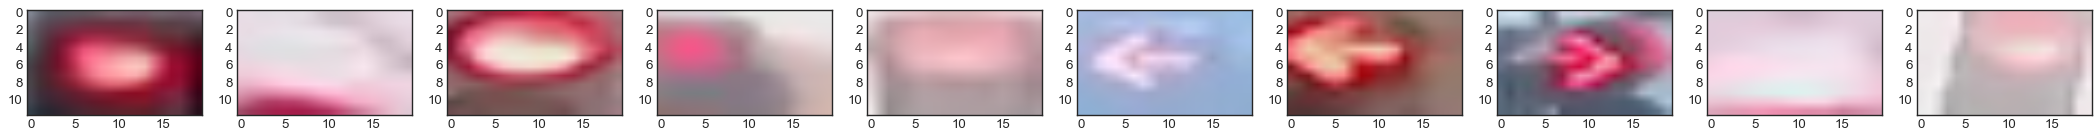

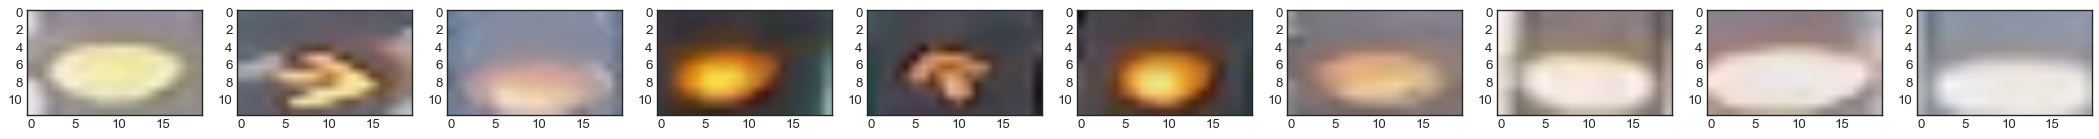

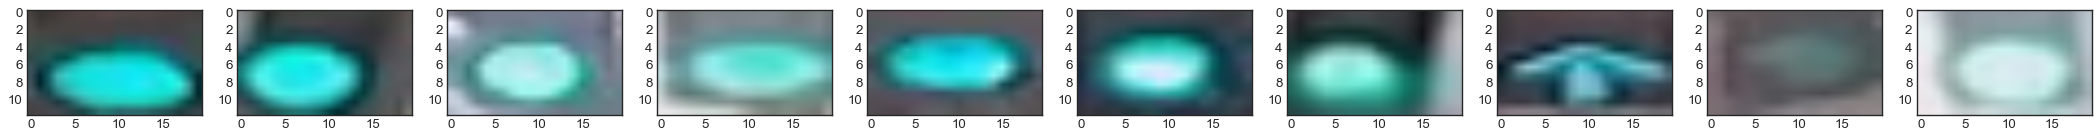

<span style='color: skyblue;'>Done!</span>

### <span style='color: orange;'>Compilation Stage 4: Locating lights in all images by using high saturation and high brightness regions</span>

A few locations of lights:
Location of red    lights: [((5, 17), (2, 11)), ((2, 14), (3, 12)), ((4, 16), (0, 9)), ((0, 12), (0, 9)), ((5, 17), (0, 9))], etc
Location of yellow lights: [((4, 16), (2, 11)), ((8, 20), (3, 12)), ((3, 15), (3, 12)), ((2, 14), (3, 12)), ((2, 14), (2, 11))], etc
Location of green  lights: [((5, 17), (3, 12)), ((1, 13), (3, 12)), ((4, 16), (3, 12)), ((5, 17), (2, 11)), ((4, 16), (2, 11))], etc


<span style='color: skyblue;'>Done!</span>

### <span style='color: orange;'>Compilation Stage 5: Cropping images at their respective light's position</span>

A few located lights:


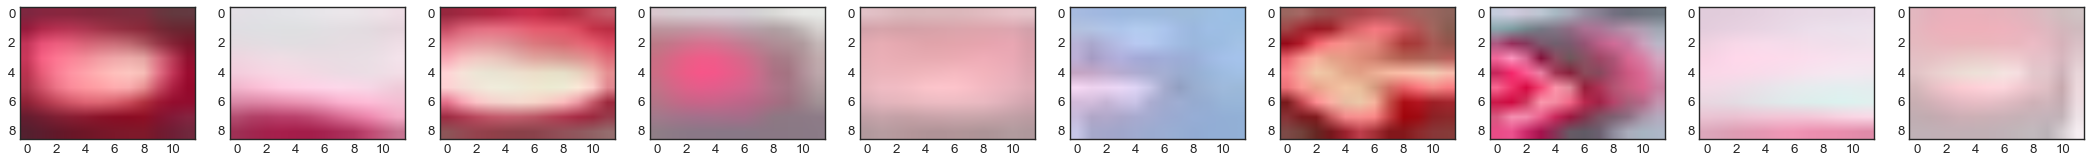

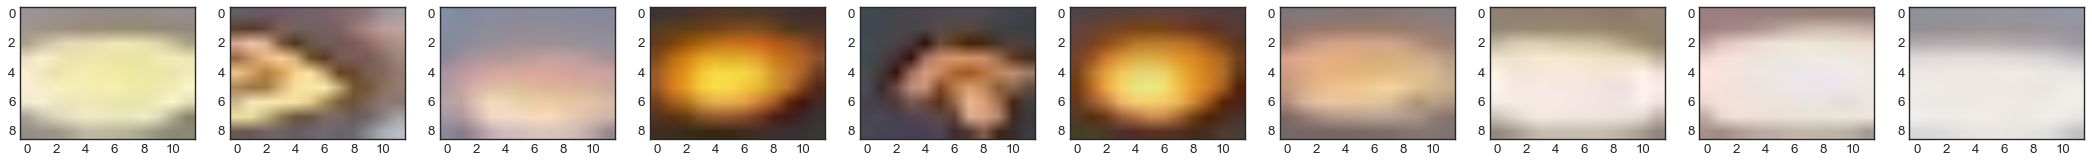

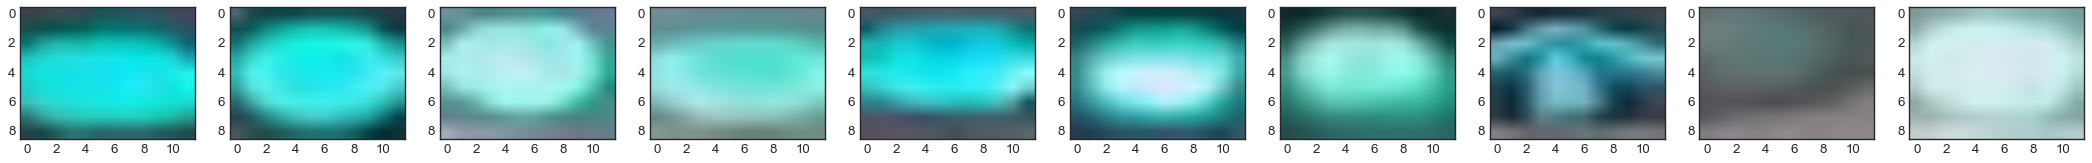

<span style='color: skyblue;'>Done!</span>

### <span style='color: orange;'>Compilation Stage 6: Getting images of average red light, average yellow light & average green light</span>

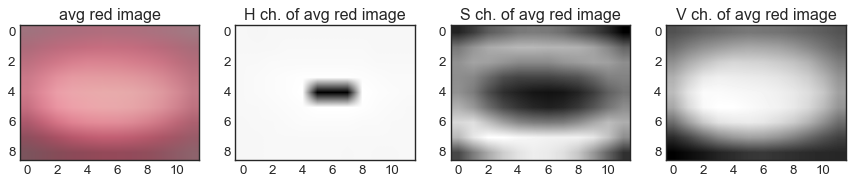

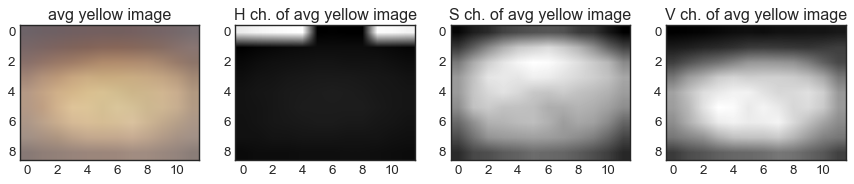

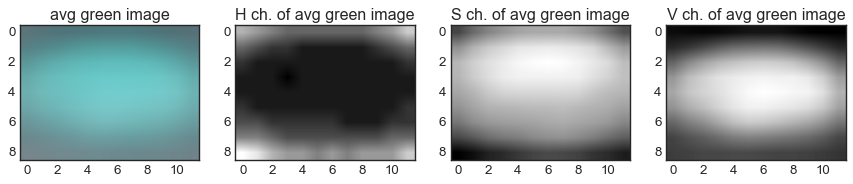

<span style='color: skyblue;'>Done!</span>

### <span style='color: orange;'>Compilation Stage 7: Getting hues, saturations and brightnesses of average red light, average yellow light & average green light</span>

#### <span style='color: skyblue;'>Compilation Stage 7a: Getting hues of average red light, average yellow light & average green light</span>

Distribution of hue in red   -lights:     mu_hue_red    = 174.667,     sigma_hue_red    = 1.660
Distribution of hue in yellow-lights:     mu_hue_yellow =  13.438,     sigma_hue_yellow = 4.330
Distribution of hue in green -lights:     mu_hue_green  =  91.620,     sigma_hue_green  = 2.120


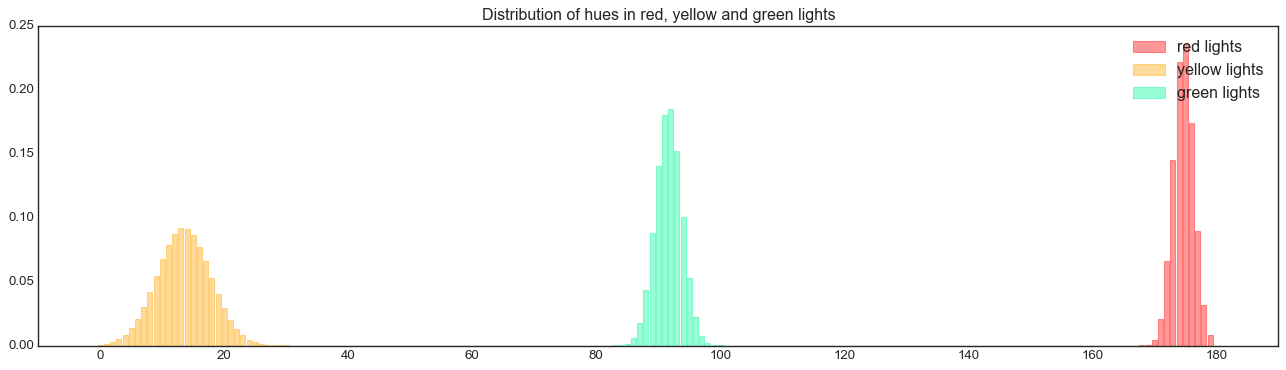

<span style='color: skyblue;'>Done!</span>

#### <span style='color: skyblue;'>Compilation Stage 7b: Getting saturations of average red light, average yellow light & average green light</span>

Distribution of saturation in red   -lights:     mu_sat_red    =  99.620,     sigma_sat_red    = 17.687
Distribution of saturation in yellow-lights:     mu_sat_yellow =  66.852,     sigma_sat_yellow = 18.777
Distribution of saturation in green -lights:     mu_sat_green  =  95.426,     sigma_sat_green  = 20.873


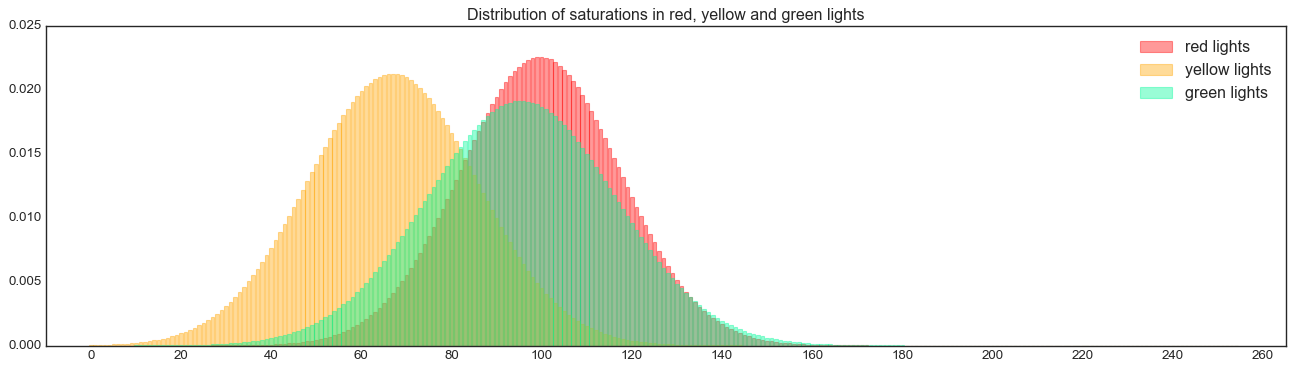

<span style='color: skyblue;'>Done!</span>

#### <span style='color: skyblue;'>Compilation Stage 7c: Getting brightnesses of average red light, average yellow light & average green light</span>

Distribution of brightness in red   -lights:     mu_brt_red    = 194.139,     sigma_brt_red    = 29.911
Distribution of brightness in yellow-lights:     mu_brt_yellow = 170.630,     sigma_brt_yellow = 33.392
Distribution of brightness in green -lights:     mu_brt_green  = 165.750,     sigma_brt_green  = 25.677


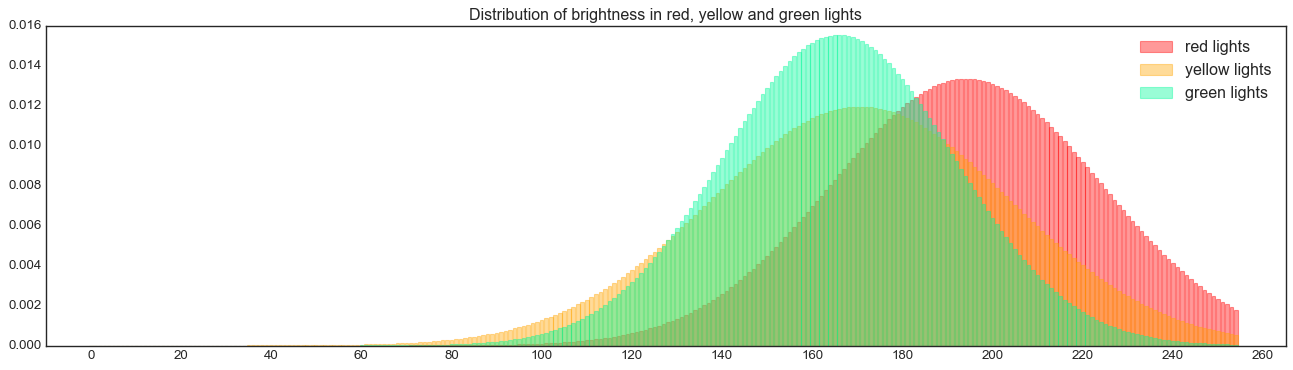

<span style='color: skyblue;'>Done!</span>

### <span style='color: orange;'>Compilation Stage 8: Optimizing classifier's metric's parameters for red, yellow and green lights</span>

### <span style="color:red"> Probabilistic model </span>
**This classifier classifies an input image either red, yellow or green based on *probabilities*.**

For a single input image, this classifier calculates **3 probabilities**:
1. Probability of image being red
2. Probability of image being yellow
3. Probability of image being green

And propobilities are calculated by,
- $Probability\ of\ image\ being\ red    = \dfrac {strength_{red}}    {strength_{red} + strength_{yellow} + strength_{green}}$
- $Probability\ of\ image\ being\ yellow = \dfrac {strength_{yellow}} {strength_{red} + strength_{yellow} + strength_{green}}$
- $Probability\ of\ image\ being\ green  = \dfrac {strength_{green}}  {strength_{red} + strength_{yellow} + strength_{green}}$

  where,  
  - $strength_{red}    = \mu_{saturation_{red}}^a    * \mu_{brightness_{red}}^b$
  - $strength_{yellow} = \mu_{saturation_{yellow}}^a * \mu_{brightness_{yellow}}^b$
  - $strength_{green}  = \mu_{saturation_{green}}^a  * \mu_{brightness_{green}}^b$
  
  and,  
    - $\mu_{saturation_{red}}$: mean saturation of red light region
    - $\mu_{brightness_{red}}$: mean brightness of red light region
    - $\mu_{saturation_{yellow}}$: mean saturation of red light region
    - $\mu_{brightness_{yellow}}$: mean brightness of red light region
    - $\mu_{saturation_{green}}$: mean saturation of red light region
    - $\mu_{brightness_{green}}$: mean brightness of red light region
    - $a$ & $b$     : model's parameters


**The current compilation stage is optimizing the parameters $a$ & $b$ for maximum accuracy.**

Please wait...

**Optimization complete !!**


<span style='color: green;'>Optimized parameters: a = 2.000000, b = 3.000000</span>

<span style='color: skyblue;'>Done!</span>

### <span style='color: orange;'>Compilation Stage 9: Getting accuracy for classifier's metric's optimized parameters for red, yellow and green lights</span>

Accuracy of training dataset:

Total images     = 1187
Pred correctly   = 1181
Accuracy overall = 99.49%

Total red images: 723
Predicted Red    = 723
Predicted Yellow = 0
Predicted Green  = 0
Accuracy         = 100.00%

Total yellow images: 35
Predicted Red    = 2
Predicted Yellow = 33
Predicted Green  = 0
Accuracy         = 94.29%

Total green images: 429
Predicted Red    = 4
Predicted Yellow = 0
Predicted Green  = 425
Accuracy         = 99.07%


<span style='color: skyblue;'>Done!</span>


Compilation complete !!


In [5]:
model.compile(show_analysis = True)

# <span style="color:orange"> Compilation Analysis </span>

## <span style="color:skyblue"> Compilation Stage 1 </span>

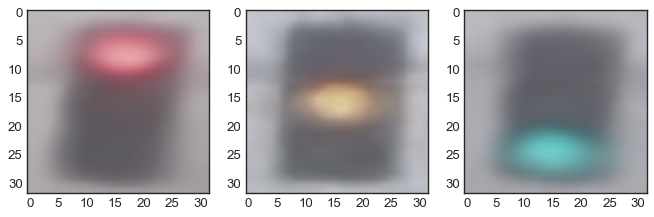

In [6]:
image_red    = model.compilation.stg1_image_avg.red
image_yellow = model.compilation.stg1_image_avg.yellow
image_green  = model.compilation.stg1_image_avg.green
images       = [image_red, image_yellow, image_green]
tlc.plots.plot_images(images)

## <span style="color:skyblue"> Compilation Stage 2a </span>

In [7]:
region_high_s_red    = model.compilation.stg2a_region_high_s.red
region_high_s_yellow = model.compilation.stg2a_region_high_s.yellow
region_high_s_green  = model.compilation.stg2a_region_high_s.green
print(f"High saturation region for red light images: {region_high_s_red}")
print(f"High saturation region for red light images: {region_high_s_yellow}")
print(f"High saturation region for red light images: {region_high_s_green}")

High saturation region for red light images: ((8, 28), (3, 15))
High saturation region for red light images: ((7, 27), (8, 20))
High saturation region for red light images: ((6, 26), (18, 30))


## <span style="color:skyblue"> Compilation Stage 2b </span>

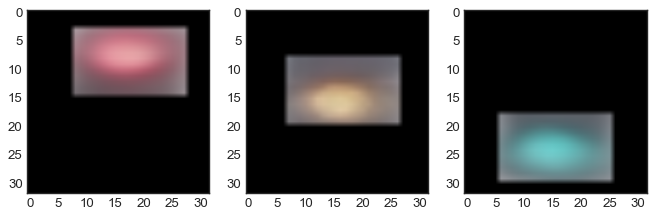

In [8]:
image_red    = model.compilation.stg2b_image_avg_masked_region_high_s.red
image_yellow = model.compilation.stg2b_image_avg_masked_region_high_s.yellow
image_green  = model.compilation.stg2b_image_avg_masked_region_high_s.green
images       = [image_red, image_yellow, image_green]
tlc.plots.plot_images(images)

## <span style="color:skyblue"> Compilation Stage 3 </span>

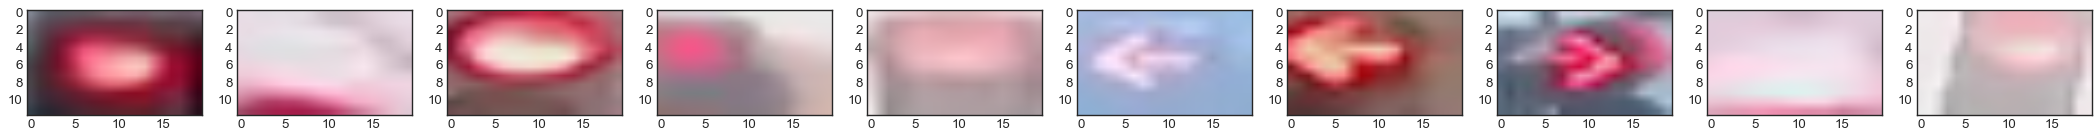

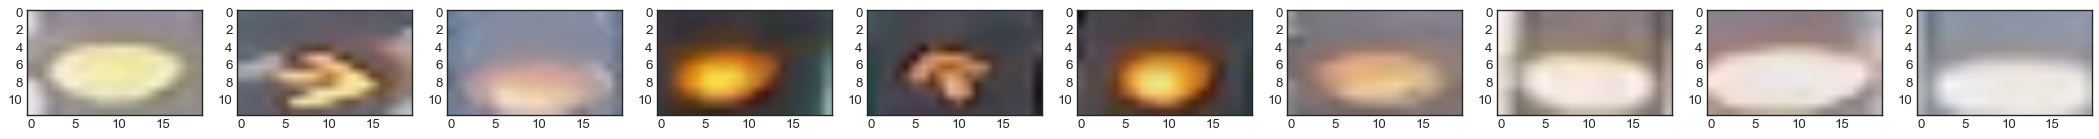

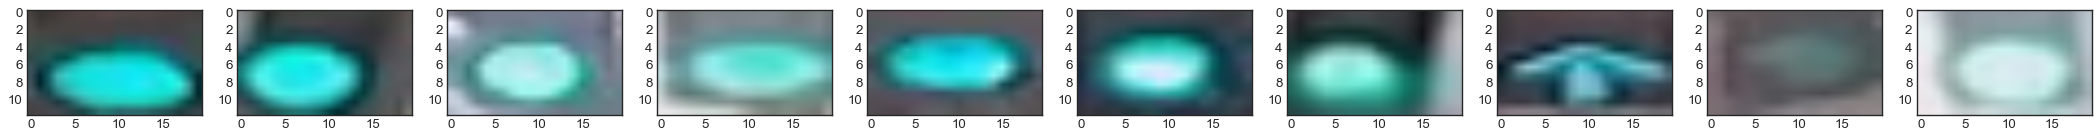

In [9]:
images_red    = model.compilation.stg3_dataset_images_cropped_high_s_region.red[0:10]
images_yellow = model.compilation.stg3_dataset_images_cropped_high_s_region.yellow[0:10]
images_green  = model.compilation.stg3_dataset_images_cropped_high_s_region.green[0:10]
tlc.plots.plot_images(images_red)
tlc.plots.plot_images(images_yellow)
tlc.plots.plot_images(images_green)

## <span style="color:skyblue"> Compilation Stage 4 </span>

In [10]:
locations_of_lights_red    = model.compilation.stg4_locations_light.red[0:5]
locations_of_lights_yellow = model.compilation.stg4_locations_light.yellow[0:5]
locations_of_lights_green  = model.compilation.stg4_locations_light.green[0:5]
print(f"Location of red    lights: {locations_of_lights_red}")
print(f"Location of yellow lights: {locations_of_lights_yellow}")
print(f"Location of green  lights: {locations_of_lights_green}")

Location of red    lights: [((5, 17), (2, 11)), ((2, 14), (3, 12)), ((4, 16), (0, 9)), ((0, 12), (0, 9)), ((5, 17), (0, 9))]
Location of yellow lights: [((4, 16), (2, 11)), ((8, 20), (3, 12)), ((3, 15), (3, 12)), ((2, 14), (3, 12)), ((2, 14), (2, 11))]
Location of green  lights: [((5, 17), (3, 12)), ((1, 13), (3, 12)), ((4, 16), (3, 12)), ((5, 17), (2, 11)), ((4, 16), (2, 11))]


## <span style="color:skyblue"> Compilation Stage 5 </span>

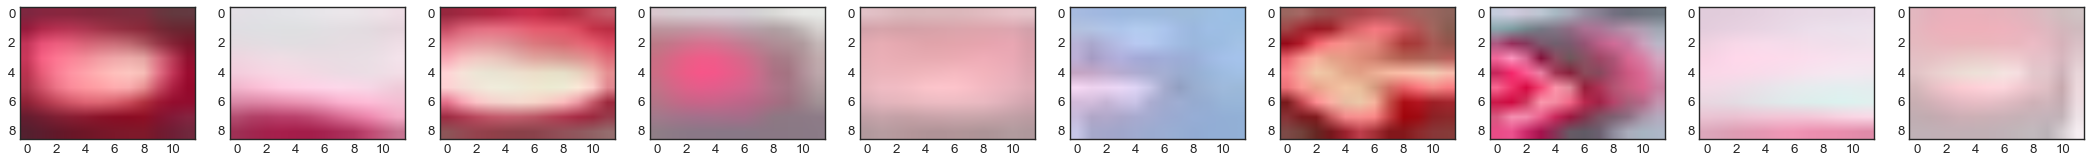

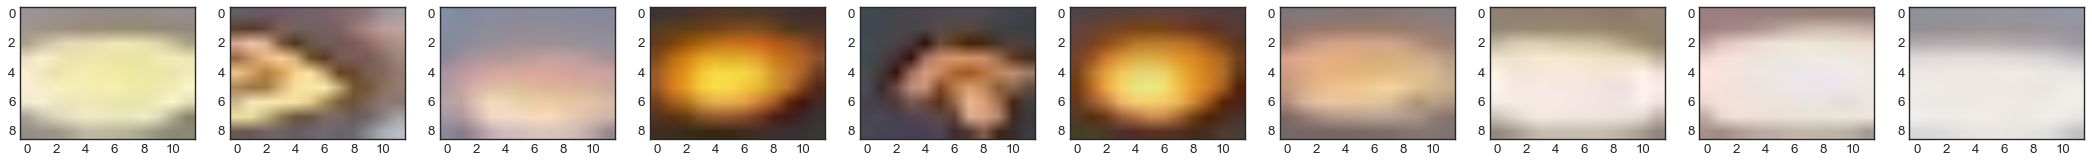

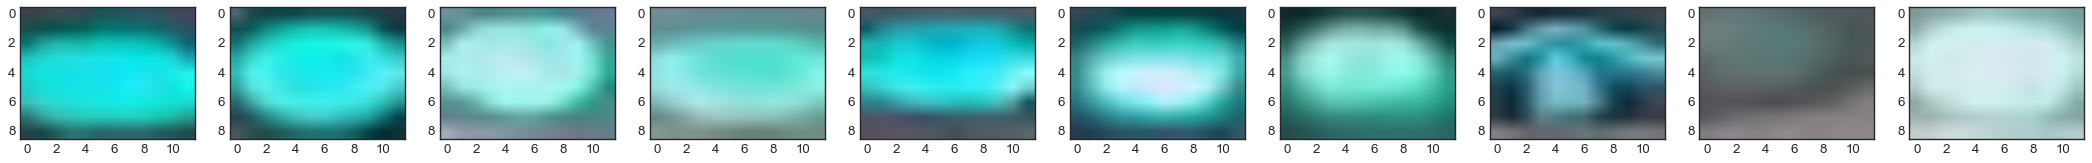

In [11]:
images_red    = model.compilation.stg5_dataset_images_light.red[0:10]
images_yellow = model.compilation.stg5_dataset_images_light.yellow[0:10]
images_green  = model.compilation.stg5_dataset_images_light.green[0:10]
tlc.plots.plot_images(images_red)
tlc.plots.plot_images(images_yellow)
tlc.plots.plot_images(images_green)

## <span style="color:skyblue"> Compilation Stage 6 </span>

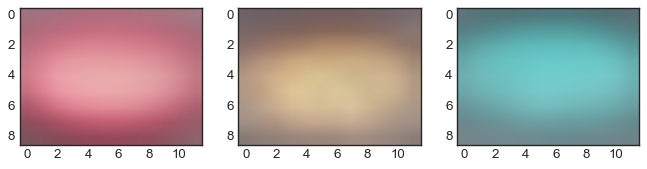

In [12]:
image_red    = model.compilation.stg6_image_light_avg.red
image_yellow = model.compilation.stg6_image_light_avg.yellow
image_green  = model.compilation.stg6_image_light_avg.green
images       = [image_red, image_yellow, image_green]
tlc.plots.plot_images(images)

## <span style="color:skyblue"> Compilation Stage 7 </span>

In [13]:
mu_red     = model.compilation.stg7a_hue_avg_light.red.mu
sig_red    = model.compilation.stg7a_hue_avg_light.red.sigma
mu_yellow  = model.compilation.stg7a_hue_avg_light.yellow.mu
sig_yellow = model.compilation.stg7a_hue_avg_light.yellow.sigma
mu_green   = model.compilation.stg7a_hue_avg_light.green.mu
sig_green  = model.compilation.stg7a_hue_avg_light.green.sigma
print(f"Distribution of hues in average red    light:    mu_red    = {mu_red:7.3f},    sig_red    = {sig_red:7.3f}")
print(f"Distribution of hues in average yellow light:    mu_yellow = {mu_yellow:7.3f},    sig_yellow = {sig_yellow:7.3f}")
print(f"Distribution of hues in average green  light:    mu_green  = {mu_green:7.3f},    sig_green  = {sig_green:7.3f}")

Distribution of hues in average red    light:    mu_red    = 174.667,    sig_red    =   1.660
Distribution of hues in average yellow light:    mu_yellow =  13.438,    sig_yellow =   4.330
Distribution of hues in average green  light:    mu_green  =  91.620,    sig_green  =   2.120


## <span style="color:skyblue"> Compilation Stage 8 </span>

## <span style="color:skyblue"> Compilation Stage 9a </span>

In [14]:
dataset_analysis_red    = model.compilation.stg9a_dataset_analysis_train.red
dataset_analysis_yellow = model.compilation.stg9a_dataset_analysis_train.yellow
dataset_analysis_green  = model.compilation.stg9a_dataset_analysis_train.green


Red light training dataset: model's red hues extracted


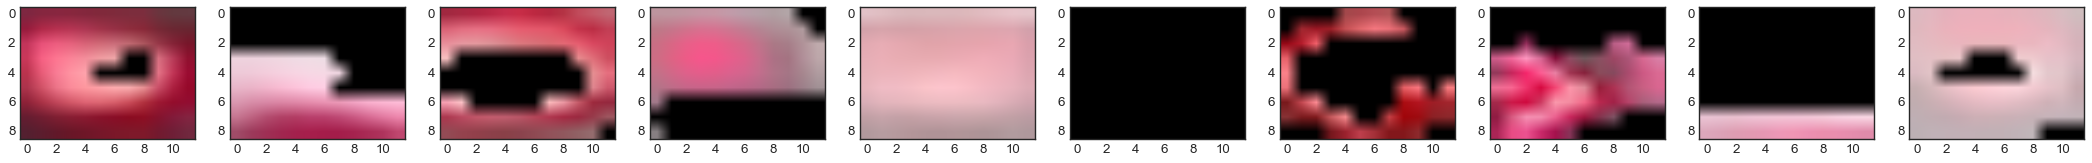

Probability of being red: [1.0, 1.0, 1.0, 1.0, 1.0, 0.33333, 0.9999, 1.0, 1.0, 1.0]

Red light training dataset: model's yellow hues extracted


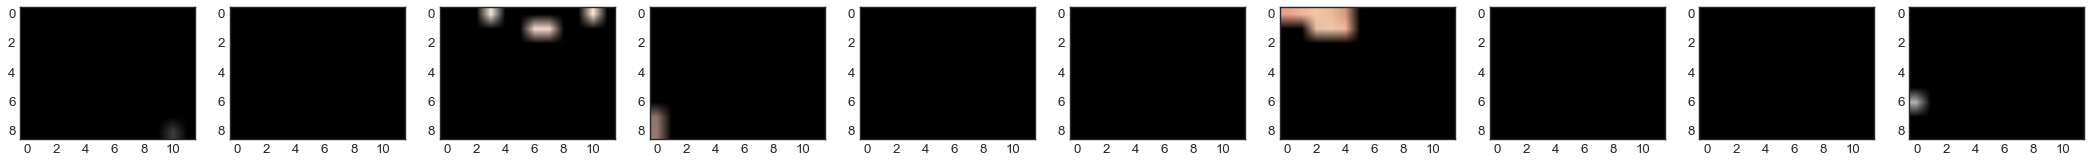

Probability of being yellow: [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333, 0.0001, 0.0, 0.0, 0.0]

Red light training dataset: model's green hues extracted


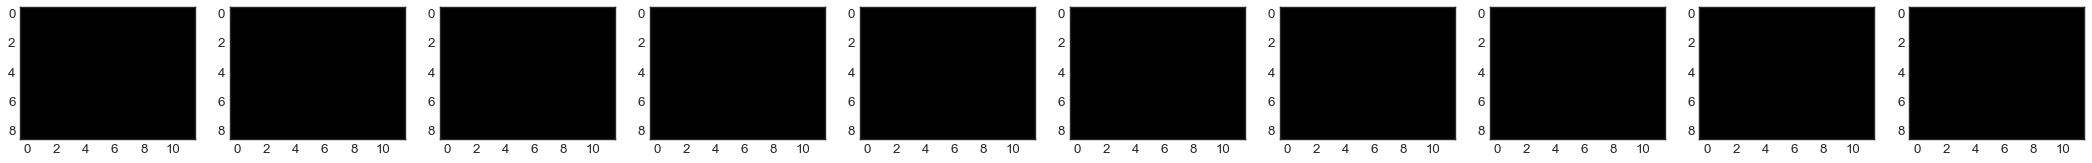

Probability of being green: [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333, 0.0, 0.0, 0.0, 0.0]


In [15]:
images_red_extracted_hue_red    = [ analysis_red.stg4_image_colors_extracted.red                 for analysis_red in dataset_analysis_red[0:10] ]
probabilities_being_red         = [ round(analysis_red.stg6_probabilities.image_being_red, 5)    for analysis_red in dataset_analysis_red[0:10] ]

images_red_extracted_hue_yellow = [ analysis_red.stg4_image_colors_extracted.yellow              for analysis_red in dataset_analysis_red[0:10] ]
probabilities_being_yellow      = [ round(analysis_red.stg6_probabilities.image_being_yellow, 5) for analysis_red in dataset_analysis_red[0:10] ]

images_red_extracted_hue_green  = [ analysis_red.stg4_image_colors_extracted.green               for analysis_red in dataset_analysis_red[0:10] ]
probabilities_being_green       = [ round(analysis_red.stg6_probabilities.image_being_green, 5)  for analysis_red in dataset_analysis_red[0:10] ]

print(f"\nRed light training dataset: model's red hues extracted")
tlc.plots.plot_images(images_red_extracted_hue_red)
print(f"Probability of being red: {probabilities_being_red}")

print(f"\nRed light training dataset: model's yellow hues extracted")
tlc.plots.plot_images(images_red_extracted_hue_yellow)
print(f"Probability of being yellow: {probabilities_being_yellow}")

print(f"\nRed light training dataset: model's green hues extracted")
tlc.plots.plot_images(images_red_extracted_hue_green)
print(f"Probability of being green: {probabilities_being_green}")



Yellow light training dataset: model's red hues extracted


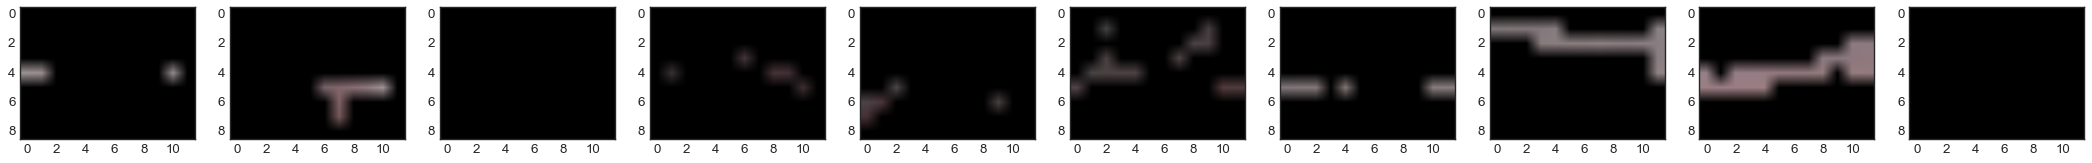

Probability of being red: [3e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1e-05, 0.00307, 0.0]

Yellow light training dataset: model's yellow hues extracted


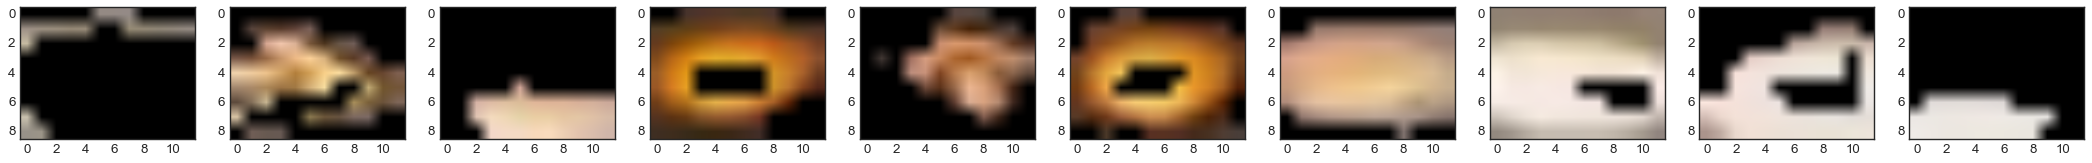

Probability of being yellow: [0.99997, 1.0, 1.0, 0.9994, 0.99948, 1.0, 1.0, 0.99999, 0.99693, 1.0]

Yellow light training dataset: model's green hues extracted


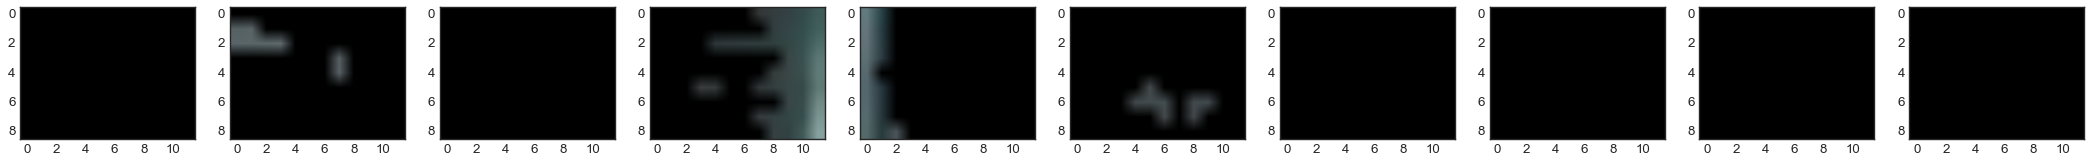

Probability of being green: [0.0, 0.0, 0.0, 0.0006, 0.00052, 0.0, 0.0, 0.0, 0.0, 0.0]


In [16]:
images_yellow_extracted_hue_red    = [ analysis_yellow.stg4_image_colors_extracted.red                 for analysis_yellow in dataset_analysis_yellow[0:10] ]
probabilities_being_red            = [ round(analysis_yellow.stg6_probabilities.image_being_red, 5)    for analysis_yellow in dataset_analysis_yellow[0:10] ]

images_yellow_extracted_hue_yellow = [ analysis_yellow.stg4_image_colors_extracted.yellow              for analysis_yellow in dataset_analysis_yellow[0:10] ]
probabilities_being_yellow         = [ round(analysis_yellow.stg6_probabilities.image_being_yellow, 5) for analysis_yellow in dataset_analysis_yellow[0:10] ]

images_yellow_extracted_hue_green  = [ analysis_yellow.stg4_image_colors_extracted.green               for analysis_yellow in dataset_analysis_yellow[0:10] ]
probabilities_being_green          = [ round(analysis_yellow.stg6_probabilities.image_being_green, 5)  for analysis_yellow in dataset_analysis_yellow[0:10] ]

print(f"\nYellow light training dataset: model's red hues extracted")
tlc.plots.plot_images(images_yellow_extracted_hue_red)
print(f"Probability of being red: {probabilities_being_red}")

print(f"\nYellow light training dataset: model's yellow hues extracted")
tlc.plots.plot_images(images_yellow_extracted_hue_yellow)
print(f"Probability of being yellow: {probabilities_being_yellow}")

print(f"\nYellow light training dataset: model's green hues extracted")
tlc.plots.plot_images(images_yellow_extracted_hue_green)
print(f"Probability of being green: {probabilities_being_green}")



Green light training dataset: model's red hues extracted


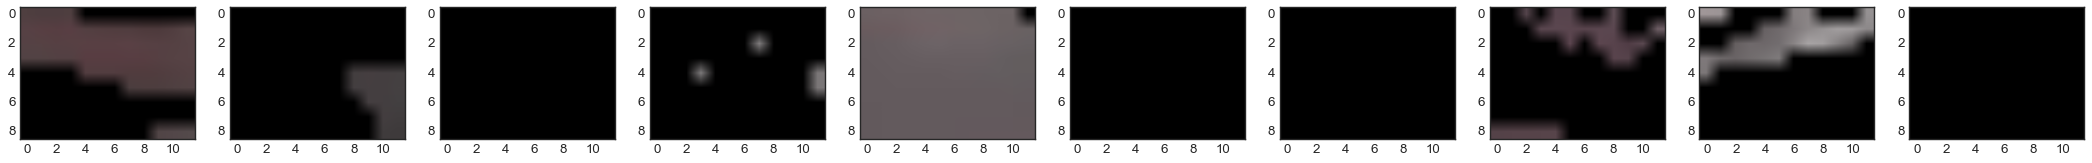

Probability of being red: [0.0004, 0.0, 0.0, 0.0, 0.00603, 0.0, 0.0, 6e-05, 0.00069, 0.0]

Green light training dataset: model's yellow hues extracted


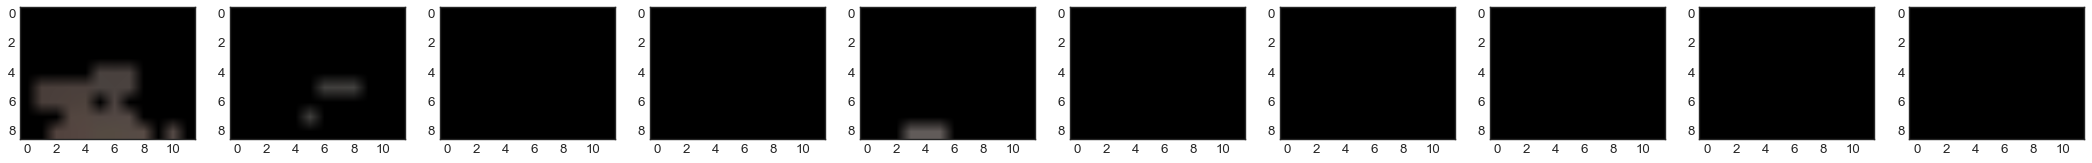

Probability of being yellow: [1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Green light training dataset: model's green hues extracted


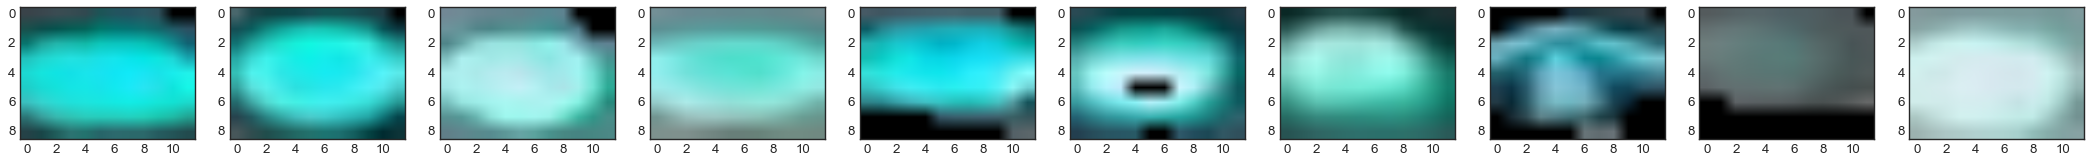

Probability of being green: [0.99959, 1.0, 1.0, 1.0, 0.99397, 1.0, 1.0, 0.99994, 0.99931, 1.0]


In [17]:
images_green_extracted_hue_red    = [ analysis_green.stg4_image_colors_extracted.red                 for analysis_green in dataset_analysis_green[0:10] ]
probabilities_being_red           = [ round(analysis_green.stg6_probabilities.image_being_red, 5)    for analysis_green in dataset_analysis_green[0:10] ]

images_green_extracted_hue_yellow = [ analysis_green.stg4_image_colors_extracted.yellow              for analysis_green in dataset_analysis_green[0:10] ]
probabilities_being_yellow        = [ round(analysis_green.stg6_probabilities.image_being_yellow, 5) for analysis_green in dataset_analysis_green[0:10] ]

images_green_extracted_hue_green  = [ analysis_green.stg4_image_colors_extracted.green               for analysis_green in dataset_analysis_green[0:10] ]
probabilities_being_green         = [ round(analysis_green.stg6_probabilities.image_being_green, 5)  for analysis_green in dataset_analysis_green[0:10] ]

print(f"\nGreen light training dataset: model's red hues extracted")
tlc.plots.plot_images(images_green_extracted_hue_red)
print(f"Probability of being red: {probabilities_being_red}")

print(f"\nGreen light training dataset: model's yellow hues extracted")
tlc.plots.plot_images(images_green_extracted_hue_yellow)
print(f"Probability of being yellow: {probabilities_being_yellow}")

print(f"\nGreen light training dataset: model's green hues extracted")
tlc.plots.plot_images(images_green_extracted_hue_green)
print(f"Probability of being green: {probabilities_being_green}")


## <span style="color:skyblue"> Compilation Stage 9b </span>

### <span style="color:green"> Accuracy on training set </span>

In [18]:
accuracy_red     = model.compilation.stg9b_accuracy_train.red
accuracy_yellow  = model.compilation.stg9b_accuracy_train.yellow
accuracy_green   = model.compilation.stg9b_accuracy_train.green
accuracy_overall = model.compilation.stg9b_accuracy_train.all
print(f"Accuracy training red    light images: {accuracy_red*100:7.3f} %")
print(f"Accuracy training yellow light images: {accuracy_yellow*100:7.3f} %")
print(f"Accuracy training green  light images: {accuracy_green*100:7.3f} %")
print(f"Accuracy training overall: {accuracy_overall*100:7.3f} %")

Accuracy training red    light images: 100.000 %
Accuracy training yellow light images:  94.286 %
Accuracy training green  light images:  99.068 %
Accuracy training overall:  99.495 %


# <span style="color:orange"> Prediction </span>

Probability of image being red    = 1.000
Probability of image being yellow = 0.000
Probability of image being green  = 0.000
This image is 'RED'


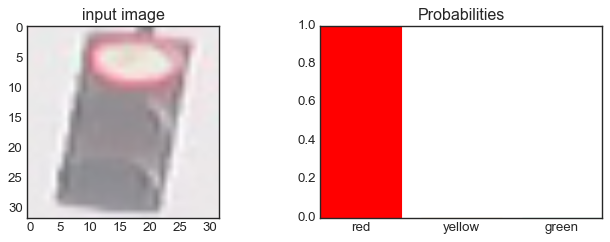

[1, 0, 0]

In [25]:
image  = random.choice( tlc.datasets.train.images_std.red )
model.predict( image, show_analysis = False, show_probabilities = True )

Probability of image being red    = 0.000
Probability of image being yellow = 1.000
Probability of image being green  = 0.000
This image is 'YELLOW'


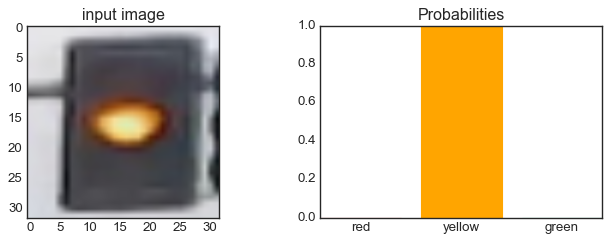

[0, 1, 0]

In [24]:
image  = random.choice( tlc.datasets.train.images_std.yellow )
model.predict( image, show_analysis = False, show_probabilities = True )

Probability of image being red    = 0.000
Probability of image being yellow = 0.000
Probability of image being green  = 1.000
This image is 'GREEN'


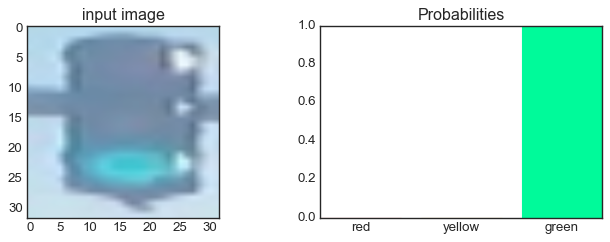

[0, 0, 1]

In [22]:
image  = random.choice( tlc.datasets.train.images_std.green )
model.predict( image, show_analysis = False, show_probabilities = True )

# <span style="color:orange"> Prediction Analysis </span>

### <span style='color: orange;'>Prediction Stage 1: Cropping image at model's optimal high saturation region for red, yellow, green light's position</span>

This procedure uses brightness features.


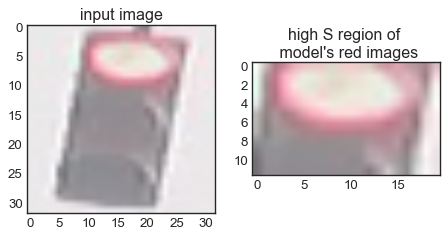

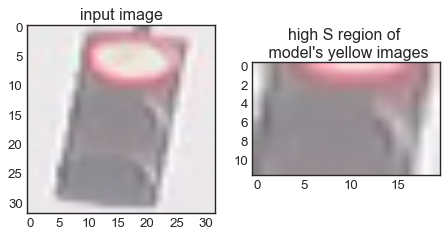

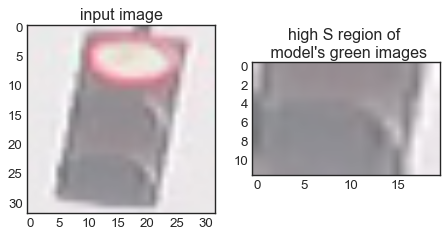

<span style='color: skyblue;'>Done!</span>

### <span style='color: orange;'>Prediction Stage 2: Locating light in model's optimal region of red, yellow, green light's region</span>

This procedure uses saturation and brightness features.


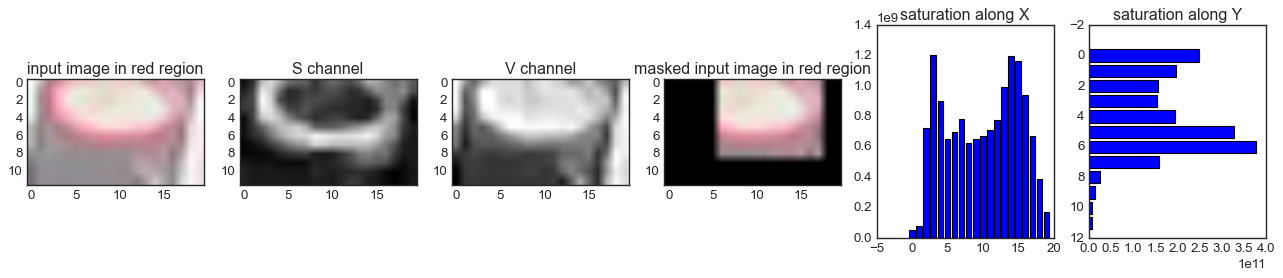

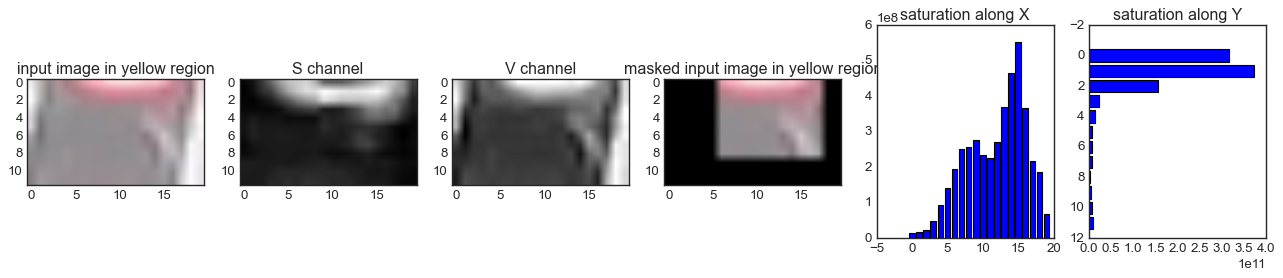

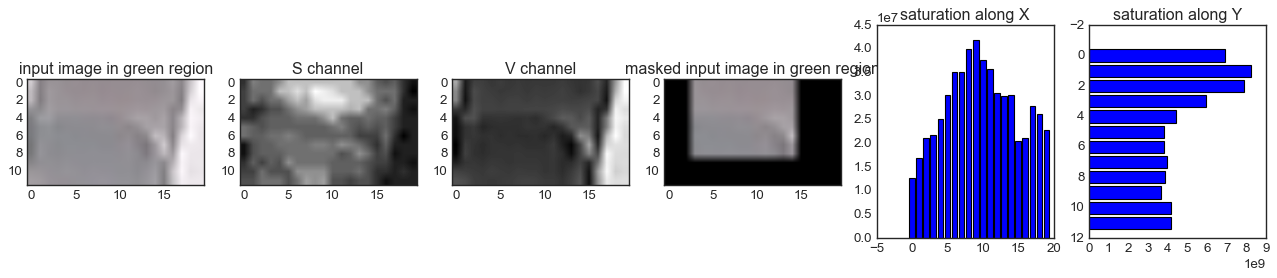

<span style='color: skyblue;'>Done!</span>

### <span style='color: orange;'>Prediction Stage 3: Cropping image at model's optimal region of red, yellow, green lights</span>

<span style='color: skyblue;'>Done!</span>

### <span style='color: orange;'>Prediction Stage 4: Extracting model's red, yellow, green light's colors from the respective cropped parts of the input image</span>

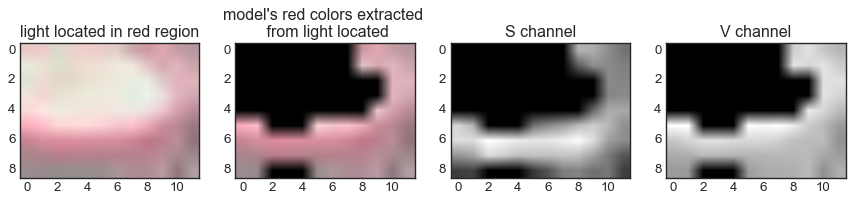

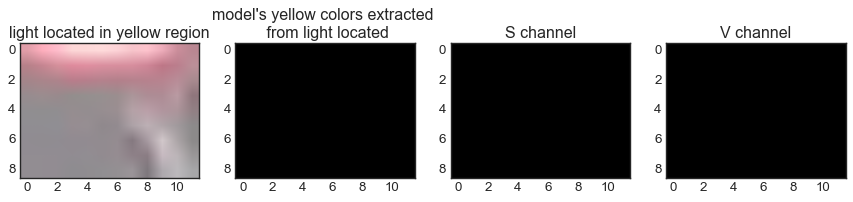

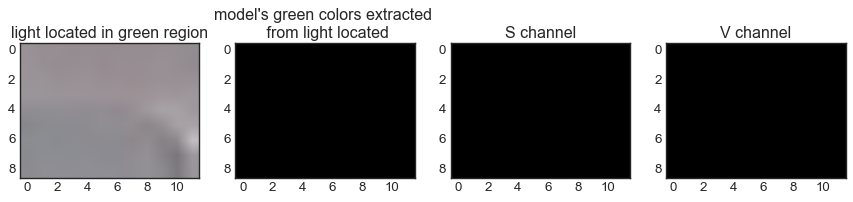

<span style='color: skyblue;'>Done!</span>

#### <span style='color: skyblue;'>Prediction Stage 5a: Getting hues from the extracted colors at model's optimal region of red, yellow, green lights</span>

Distribution of hues at model's red    light region:     mu_hue_red    = 173.965,     sigma_hue_red    = 1.389
Distribution of hues at model's yellow light region:     mu_hue_yellow =   0.000,     sigma_hue_yellow = 0.000
Distribution of hues at model's green  light region:     mu_hue_green  =   0.000,     sigma_hue_green  = 0.000


<span style='color: skyblue;'>Done!</span>

#### <span style='color: skyblue;'>Prediction Stage 5b: Getting saturations from the extracted colors at model's optimal region of red, yellow, green lights</span>

Distribution of saturations at model's red    light region:     mu_sat_red    =  31.880,     sigma_sat_red    = 33.285
Distribution of saturations at model's yellow light region:     mu_sat_yellow =   0.000,     sigma_sat_yellow = 0.000
Distribution of saturations at model's green  light region:     mu_sat_green  =   0.000,     sigma_sat_green  = 0.000


<span style='color: skyblue;'>Done!</span>

#### <span style='color: skyblue;'>Prediction Stage 5c: Getting brightnesses from the extracted colors at model's optimal region of red, yellow, green lights</span>

Distribution of brightnesses at model's red    light region:     mu_brt_red    = 104.519,     sigma_brt_red    = 101.116
Distribution of brightnesses at model's yellow light region:     mu_brt_yellow =   0.000,     sigma_brt_yellow = 0.000
Distribution of brightnesses at model's green  light region:     mu_brt_green  =   0.000,     sigma_brt_green  = 0.000


<span style='color: skyblue;'>Done!</span>

### <span style='color: orange;'>Prediction Stage 6: Calculating probabilities of image being red, yellow and green</span>

### <span style="color:red"> Probabilistic model </span>
**This classifier classifies an input image either red, yellow or green based on *probabilities*.**

For a single input image, this classifier calculates **3 probabilities**:
1. Probability of image being red
2. Probability of image being yellow
3. Probability of image being green

And propobilities are calculated by,
- $Probability\ of\ image\ being\ red    = \dfrac {strength_{red}}    {strength_{red} + strength_{yellow} + strength_{green}}$
- $Probability\ of\ image\ being\ yellow = \dfrac {strength_{yellow}} {strength_{red} + strength_{yellow} + strength_{green}}$
- $Probability\ of\ image\ being\ green  = \dfrac {strength_{green}}  {strength_{red} + strength_{yellow} + strength_{green}}$

  where,  
  - $strength_{red}    = \mu_{saturation_{red}}^a    * \mu_{brightness_{red}}^b$
  - $strength_{yellow} = \mu_{saturation_{yellow}}^a * \mu_{brightness_{yellow}}^b$
  - $strength_{green}  = \mu_{saturation_{green}}^a  * \mu_{brightness_{green}}^b$
  
  and,  
    - $\mu_{saturation_{red}}$: mean saturation of red light region
    - $\mu_{brightness_{red}}$: mean brightness of red light region
    - $\mu_{saturation_{yellow}}$: mean saturation of red light region
    - $\mu_{brightness_{yellow}}$: mean brightness of red light region
    - $\mu_{saturation_{green}}$: mean saturation of red light region
    - $\mu_{brightness_{green}}$: mean brightness of red light region
    - $a$ & $b$     : model's parameters


Probability of image being red    = 1.000
Probability of image being yellow = 0.000
Probability of image being green  = 0.000


<span style='color: skyblue;'>Done!</span>

### <span style='color: orange;'>Prediction Stage 7: Predicting image</span>

This image is 'RED'


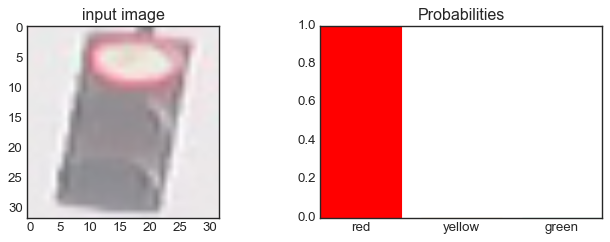

<span style='color: skyblue;'>Done!</span>

[1, 0, 0]

In [26]:
import random
model.predict( image, show_analysis = True )

In [24]:
# help(model.predict)

# Traffic Light Classifier
---

In this project, I have used my knowledge of computer vision techniques to build a classifier for images of traffic lights! We have given dataset of traffic light images in which one of three lights is illuminated: Red, Yellow, or Green.

In this notebook, we will pre-process these images, extract features that will help us distinguish the different types of images, and use those features to classify the traffic light images into three classes: Red, Yellow, or Green. The tasks will be broken down into a few sections:

1. **Loading and visualizing the data**. 
      The first step in any classification task is to be familiar with our data; we will need to load in the images of traffic lights and visualize them!

2. **Pre-processing**. 
    The input images and output labels need to be standardized. This way, we can analyze all the input images using the same classification pipeline, and we know what output to expect when we eventually classify a *new* image.
    
3. **Feature extraction**. 
    Next, we will extract some features from each image that will help distinguish and eventually classify these images.
   
4. **Classification and visualizing error**. 
    Finally, we will write one function that uses your features to classify *any* traffic light image. This function will take in an image and output a label. We will also write a code to determine the accuracy of your classification model.   
    
5. **Evaluate your model**.
    Our classifier must be >90% accurate and never classify any red lights as green; it's likely that we will need to improve the accuracy of your classifier by changing existing features or adding new features.
    
Here are some sample images from the dataset (from left to right: Red, Green, and Yellow traffic lights):
<img src="images/all_lights.png" width="50%" height="50%">


# 1. Loading and Visualizing the Traffic Light Dataset

This traffic light dataset consists of 1484 number of color images in 3 categories - Red, Yellow, and Green. As with most human-sourced data, the data is not evenly distributed among the types. There are:
* 904 red traffic light images
* 536 green traffic light images
* 44 yellow traffic light images

*Note: All images come from this [MIT self-driving car course](https://selfdrivingcars.mit.edu/) and are licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).*

### Import resources

In [25]:
import traffic_light_classifier as tlc
import cv2 # computer vision library
# import helpers # helper functions
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images
# %matplotlib inline

## Training and Testing Data

All 1484 of the traffic light images are separated into training and testing datasets. 

* 80% of these images are training images, for us to use as you create a classifier.
* 20% are test images, which will be used to test the accuracy of your classifier.
* All images are pictures of 3-light traffic lights with one light illuminated.

## Define the image directories

First, we set some variables to keep track of some where our images are stored:

    IMAGE_DIR_TRAINING: the directory where our training image data is stored
    IMAGE_DIR_TEST: the directory where our test image data is stored

In [26]:
# Image data directories >>
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST     = "traffic_light_images/test/"

## Load the datasets

These first few lines of code will load the training traffic light images and store all of them in a variable, `IMAGES_TRAIN`. This list contains the images and their associated label ("red", "yellow", "green"). 

We are using [glob library](https://pymotw.com/2/glob/) to read image files from a directory. The `load_dataset` function takes in the name of an image directory and returns a list of images and their associated labels. 

For example, the first image-label pair in `IMAGES_TRAIN` can be accessed by index: 
``` IMAGES_TRAIN[0][:]```.


In [27]:
# Loading training data >>
# IMAGES_TRAIN = helpers.load_dataset(IMAGE_DIR_TRAINING)
IMAGES_TRAIN = tlc.helpers.load_dataset(IMAGE_DIR_TRAINING)

## Visualize the Data

The first steps in analyzing any dataset are to:

1. Load the data.
2. Look at the data.

Seeing what it looks like will give us an idea of:

- What to look for in the images.
- What kind of noise or inconsistencies we have to deal with, and so on.

This will help us understand the image dataset, and **understanding a dataset is part of making predictions about the data**.

---
### Visualize the input images

Visualize and explore the image data!
* Display the image
* Print out the shape of the image 
* Print out its corresponding label

In [28]:
IMAGES_TRAIN_red    = [ image for image in IMAGES_TRAIN if image[1] == "red" ]
IMAGES_TRAIN_yellow = [ image for image in IMAGES_TRAIN if image[1] == "yellow" ]
IMAGES_TRAIN_green  = [ image for image in IMAGES_TRAIN if image[1] == "green" ]

In [29]:
IMAGES_TRAIN[0][1]

'red'

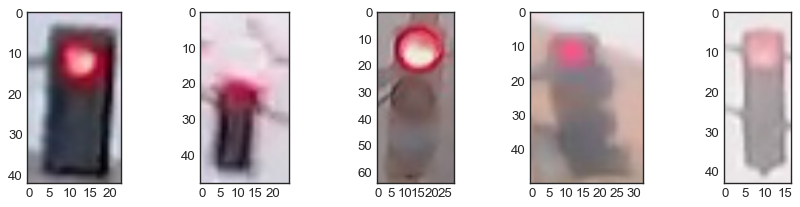

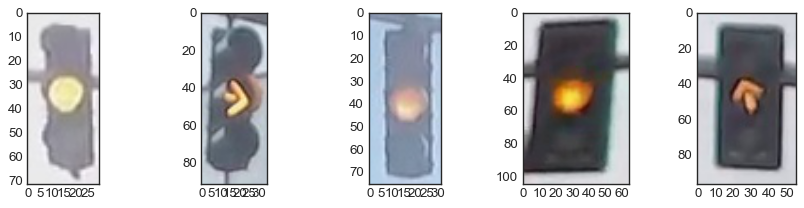

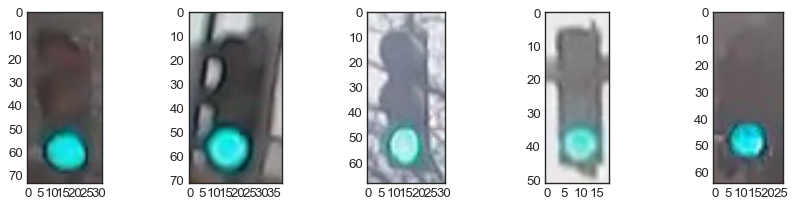

In [30]:
# Visualizing images of different color >>
tlc.plots.plot_images( IMAGES_TRAIN_red[0:5],    title_enabled = True, figsizeScale = 0.8 )
tlc.plots.plot_images( IMAGES_TRAIN_yellow[0:5], title_enabled = True, figsizeScale = 0.8 )
tlc.plots.plot_images( IMAGES_TRAIN_green[0:5],  title_enabled = True, figsizeScale = 0.8 )

# 2. Pre-process the Data

After loading in each image, we have to standardize the input and output!

### Input

This means that every input image should have:

1. The same format,
2. The same size, and so on.

We'll be creating features by performing the same analysis on every picture, and for a classification task like this, it's important that **similar images create similar features**! 

### Output

We also need the output to be a label that is easy to read and easy to compare with other labels. It is good practice to convert categorical data like "red" and "green" to numerical data.

A very common classification output is a 1D list that is the length of the number of classes - three in the case of red, yellow, and green lights - with the values 0 or 1 indicating which class a certain image is.  

For example, since we have three classes (red, yellow, and green), we can make a list with the order: [red value, yellow value, green value]. In general, order does not matter, we choose the order [red value, yellow value, green value] in this case to reflect the position of each light in descending vertical order.

Lights should have labels:  
A red light: [1, 0, 0].  
A yellow light: [0, 1, 0].  
A green light: [0, 0, 1].  

These labels are called **one-hot encoded labels**.

*(Note: one-hot encoding will be especially important when you work with [machine learning algorithms](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)).*

<img src="images/processing_steps.png" width="80%" height="80%">


---
<a id='task2'></a>
### Standardize the input images

* Resize each image to the desired input size: 32x32px.
It's very common to have square input sizes that can be rotated (and remain the same size), and analyzed in smaller, square patches. It's also important to make all your images the same size so that they can be sent through the same pipeline of classification steps!

### Standardize the output

With each loaded image, we also specify the expected output. For this, we use **one-hot encoding**.

* One-hot encode the labels. To do this, create an array of zeros representing each class of traffic light (red, yellow, green), and set the index of the expected class number to 1. 

Since we have three classes (red, yellow, and green), we have imposed an order of: [red value, yellow value, green value]. To one-hot encode, say, a yellow light, we would first initialize an array to [0, 0, 0] and change the middle value (the yellow value) to 1: [0, 1, 0].


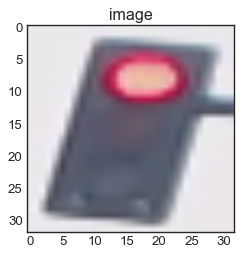

In [31]:
image_std = tlc.modify_images.standardize_image(IMAGES_TRAIN[10][0])
tlc.plots.plot_images(image_std)

---
<a id='task3'></a>
### One-hot encoding

In [32]:
# help(tlc.helpers.one_hot_encode)

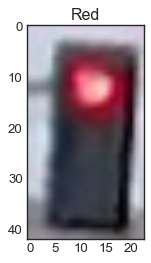

One hot encode = [1, 0, 0]


In [33]:
i_image = 0
tlc.plots.plot_images( IMAGES_TRAIN[i_image] )
encode = tlc.helpers.one_hot_encode( IMAGES_TRAIN[i_image][1] )
print(f"One hot encode = {encode}")

In [34]:
tlc.helpers.one_hot_encode_reverse( encode )

'Red'

### Testing as you Code

After programming a function, it's a good idea to test it, and see if it produces the expected output. **In general, it's good practice to test code in small, functional pieces, after you write it**. This way, we can make sure that your code is correct as we continue to build a classifier, and we can identify any errors early on so that they don't compound.

All test code can be found in the file `__tests_subpkg__.test_functions.py`.

One test function you'll find is: `test_one_hot(self, one_hot_function)` which takes in one argument, a one_hot_encode function, and tests its functionality. If our one_hot_label code does not work as expected, this test will print ot an error message that will tell us a bit about why our code failed. Once our code works, this should print out TEST PASSED.

In [35]:
# Instantiating an object of class 'Tests' from module 'test_functions'.
tests = tlc.tests.Tests()

# Test for one_hot_encode function
tests.test_one_hot(tlc.helpers.one_hot_encode)


**<span style="color: green;">TEST PASSED</span>**

## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and one-hot encoded labels.

This uses the functions we defined above to standardize the input and output, so those functions must be complete for this standardization to work!


In [36]:
images_train_std        = tlc.modify_images.standardize_images(IMAGES_TRAIN)
images_train_std_red    = tlc.modify_images.standardize_images(IMAGES_TRAIN_red)
images_train_std_yellow = tlc.modify_images.standardize_images(IMAGES_TRAIN_yellow)
images_train_std_green  = tlc.modify_images.standardize_images(IMAGES_TRAIN_green)

## Visualize the standardized data

Displaying standardized images from STANDARDIZED_LIST and compare it with a non-standardized image from IMAGE_LIST. Note that their sizes and appearance are different!

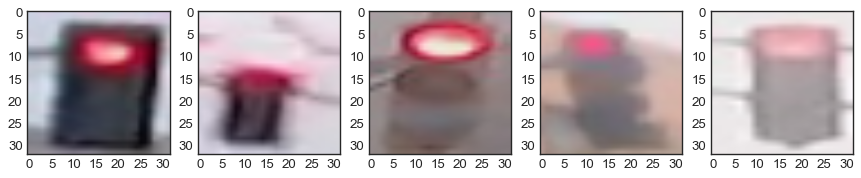

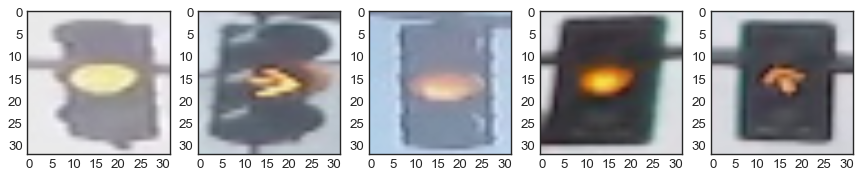

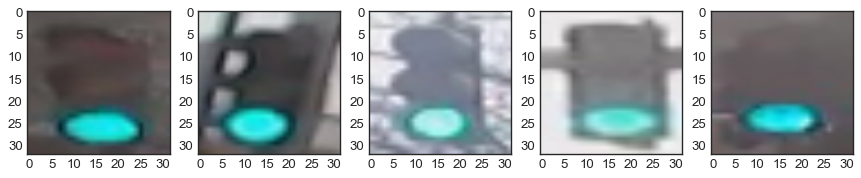

In [37]:
tlc.plots.plot_images( images_train_std_red[0:5],    figsizeScale = 0.8 )
tlc.plots.plot_images( images_train_std_yellow[0:5], figsizeScale = 0.8 )
tlc.plots.plot_images( images_train_std_green[0:5],  figsizeScale = 0.8 )

# 3. Feature Extraction

We will be using knowledge of follwing to create features that help distinguish and classify the three types of traffic light images.
1. Color spaces.
2. Shape analysis,
3. Feature construction 


1. A brightness feature.
2. Saturation feature.
3. Hue feature.
4. Location of the light.
are the possible candidates from the glimps of the images so far.

These features will be combined near the end of this notebook to form a complete classification algorithm.

## RGB to HSV conversion

Below, a test image is converted from RGB to HSV colorspace and each component is displayed in an image.

In [38]:
i_image = 0
image_rgb       = images_train_std[i_image][0]
label_image_rgb = images_train_std[i_image][1]

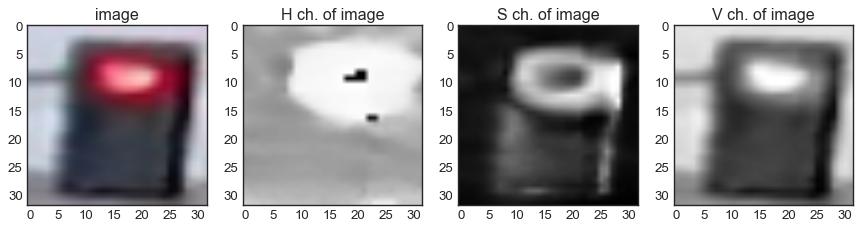

In [39]:
tlc.plots.plot_channels(images_train_std[0][0], "hsv")

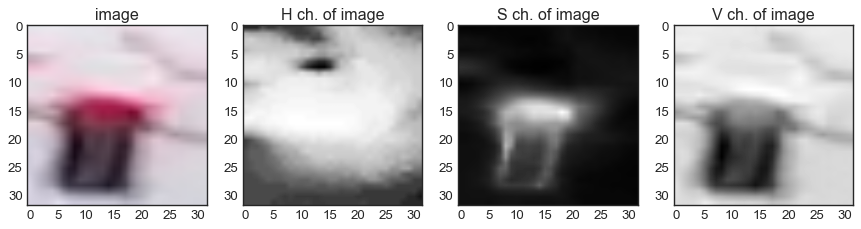

In [40]:
tlc.plots.plot_channels(images_train_std[1][0], "hsv")

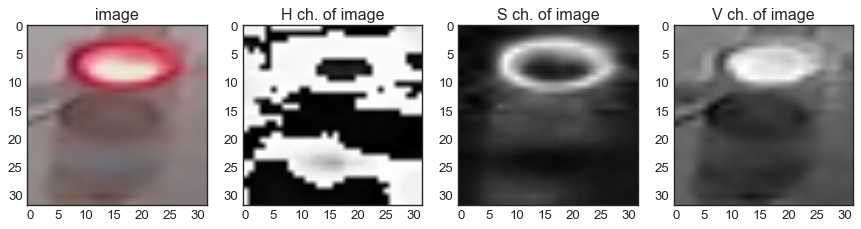

In [41]:
tlc.plots.plot_channels(images_train_std[2][0], "hsv")

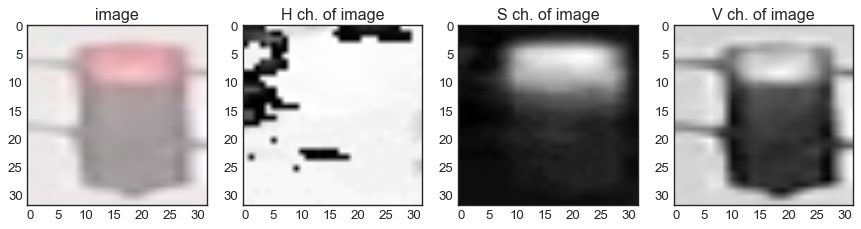

In [42]:
tlc.plots.plot_channels(images_train_std[4][0], "hsv")

### RGB Image

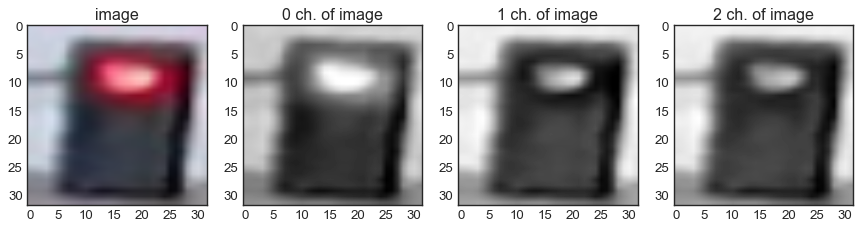

In [43]:
# plotting rgb channels
tlc.plots.plot_channels(image_rgb, type_channels = "viridis")

### RGB Image (grayscale)

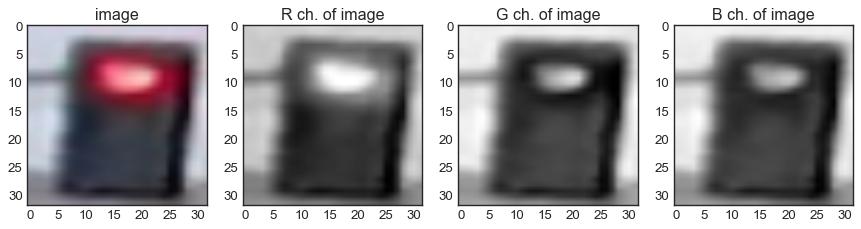

In [44]:
# plotting grayscale rgb channels
image_hsv = tlc.plots.plot_channels(image_rgb, type_channels = "rgb", cmap = "gray")

### HSV Image

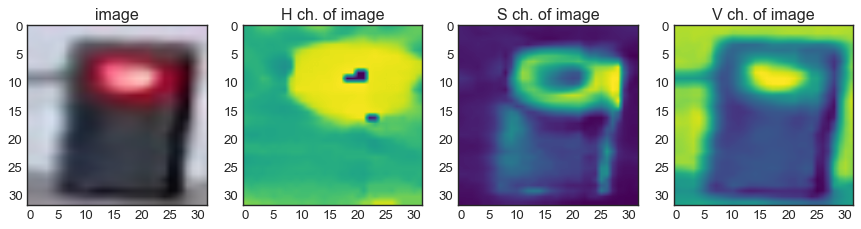

In [45]:
# plotting hsv channels
image_hsv = tlc.modify_images.convert_rgb_to_hsv(image_rgb, plot_enabled = True, cmap = "viridis")

### HSV Image (grayscale)

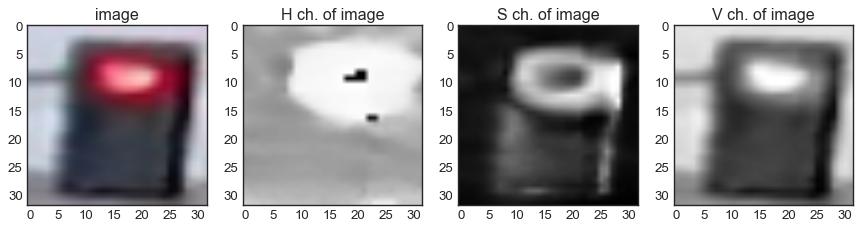

In [46]:
# plotting grayscale hsv channels
image_hsv = tlc.modify_images.convert_rgb_to_hsv(image_rgb, plot_enabled = True, cmap = "gray")

## Getting Average Image to estimate the average location of red, yellow & green lights

**Purpose**: To estimate the average location of the each kind of light i.e. red, yellow & green.  

**Approach**:
1. Take average of each channel of all red images and get a average image. It is like merging all images together.  
2. Do same for green and yellow.
3. This will give a single image of each kind of signal lights which we will use to estimate the location of light in image.


In [47]:
plot_enabled  = True
type_channels = "rgb"
image_avg_red    = tlc.extract_feature.get_average_image(model.images_train_std.red,    plot_enabled, type_channels, name_image = "avg red image")
image_avg_yellow = tlc.extract_feature.get_average_image(model.images_train_std.yellow, plot_enabled, type_channels, name_image = "avg yellow image")
image_avg_green  = tlc.extract_feature.get_average_image(model.images_train_std.green,  plot_enabled, type_channels, name_image = "avg green image")

AttributeError: 'Model' object has no attribute 'images_train_std'

In [ ]:
# plot_enabled  = True
# type_channels = "rgb"
# image_avg_red    = tlc.extract_feature.get_average_image(images_train_std_red,    plot_enabled, type_channels, name_image = "avg red image")
# image_avg_yellow = tlc.extract_feature.get_average_image(images_train_std_yellow, plot_enabled, type_channels, name_image = "avg yellow image")
# image_avg_green  = tlc.extract_feature.get_average_image(images_train_std_green,  plot_enabled, type_channels, name_image = "avg green image")

It looks like the averaging has been done proporly, at least from the look of it.  

## Finding clues to the identity mark

**Purpose**: Find something unique in the average images which gives some useful imformation about the location or something which distincts one light from another.  

**Observation**: Above rgb channels are not useful, lets observe hsv channels


### Observation in h, s, v channels of average red, yellow & green image

In [48]:
rgb_to_hsv = tlc.modify_images.convert_rgb_to_hsv
plot_enabled = True
image_avg_red_hsv    = rgb_to_hsv( image_avg_red,    plot_enabled, name_image = "avg red image")
image_avg_yellow_hsv = rgb_to_hsv( image_avg_yellow, plot_enabled, name_image = "avg yellow image")
image_avg_green_hsv  = rgb_to_hsv( image_avg_green,  plot_enabled, name_image = "avg green image")

NameError: name 'image_avg_red' is not defined

In the above images h, s and v channels are plotted for the same average image.

**Observation**: Here we can see that a clear indicators for the location of the the light and that is **high brightness**.

Now we can use this insights to build a algorithm to estimate the location of lights.

## Locating high saturation region

**Approach**:  

We can traverse through grid and get the average saturation axially along both x & y axes and then make plots.  
And then we can calculate the area for some range of regions for those axial saturation values to find the region of high saturation.

#### Testing function

In [49]:
get_location_of_light = tlc.extract_feature.get_location_of_light
range_XY = get_location_of_light(images_train_std[0][0], plot_enabled = True)
print(f"Region of hish saturation is:")
print(f"                   On X: {range_XY[0]}")
print(f"                   On Y: {range_XY[1]}")

AttributeError: module 'traffic_light_classifier.extract_feature' has no attribute 'get_location_of_light'

As you can se in the above figure, the function did a fair job at finding the most saturated region.

### Locating high saturation region in average images

In [50]:
get_location_of_light = tlc.extract_feature.get_location_of_light
shape_area_search = (13,10)
range_avg_s_red    = get_location_of_light(image_avg_red,    shape_area_search = shape_area_search, plot_enabled = True, name_image = "avg red image")
range_avg_s_yellow = get_location_of_light(image_avg_yellow, shape_area_search = shape_area_search, plot_enabled = True, name_image = "avg yellow image")
range_avg_s_green  = get_location_of_light(image_avg_green,  shape_area_search = shape_area_search, plot_enabled = True, name_image = "avg green image")
print(f"Range of high Saturation for average of Red    images: X = {range_avg_s_red[0]}, Y = {range_avg_s_red[1]}")
print(f"Range of high Saturation for average of yellow images: X = {range_avg_s_yellow[0]}, Y = {range_avg_s_yellow[1]}")
print(f"Range of high Saturation for average of green  images: X = {range_avg_s_green[0]}, Y = {range_avg_s_green[1]}")

AttributeError: module 'traffic_light_classifier.extract_feature' has no attribute 'get_location_of_light'

In [51]:
# location, _ = tlc.extract_feature.get_range_of_high_average_channel( image_rgb, "s", extra_channel = "v", plot_enabled  = True, name_image = "MISCLASSIFIED[3]"
#             , i = 1 , j = 3 )
# location

get_range_of_high_average_channel = tlc.extract_feature.get_range_of_high_average_channel
shape_area_search = (20, 16)
range_avg_s_red, _    = get_range_of_high_average_channel(image_avg_red,    "s", "v", shape_area_search, plot_enabled = True, name_image = "avg red image"    , i = 1 , j = 0 )
range_avg_s_yellow, _ = get_range_of_high_average_channel(image_avg_yellow, "s", "v", shape_area_search, plot_enabled = True, name_image = "avg yellow image" , i = 1 , j = 0 )
range_avg_s_green, _  = get_range_of_high_average_channel(image_avg_green,  "s", "v", shape_area_search, plot_enabled = True, name_image = "avg green image"  , i = 1 , j = 0 )
print(f"Range of high Saturation for average of Red    images: X = {range_avg_s_red[0]}, Y = {range_avg_s_red[1]}")
print(f"Range of high Saturation for average of yellow images: X = {range_avg_s_yellow[0]}, Y = {range_avg_s_yellow[1]}")
print(f"Range of high Saturation for average of green  images: X = {range_avg_s_green[0]}, Y = {range_avg_s_green[1]}")


AttributeError: module 'traffic_light_classifier.extract_feature' has no attribute 'get_range_of_high_average_channel'

In [52]:
image_avg_red_cropped    = tlc.modify_images.crop_image( image_avg_red,    range_crop_x = range_avg_s_red[0],    range_crop_y = range_avg_s_red[1],    plot_enabled = False )
image_avg_yellow_cropped = tlc.modify_images.crop_image( image_avg_yellow, range_crop_x = range_avg_s_yellow[0], range_crop_y = range_avg_s_yellow[1], plot_enabled = False )
image_avg_green_cropped  = tlc.modify_images.crop_image( image_avg_green,  range_crop_x = range_avg_s_green[0],  range_crop_y = range_avg_s_green[1],  plot_enabled = False )

NameError: name 'image_avg_red' is not defined

In [53]:
# location, _ = tlc.extract_feature.get_range_of_high_average_channel( image_rgb, "s", extra_channel = "v", plot_enabled  = True, name_image = "MISCLASSIFIED[3]"
#             , i = 1 , j = 3 )
# location

get_range_of_high_average_channel = tlc.extract_feature.get_range_of_high_average_channel
shape_area_search = (13, 10)
range_avg_s_red, _    = get_range_of_high_average_channel(image_avg_red_cropped,    "s", shape_area_search, "v", plot_enabled = True, name_image = "avg red image"    , i = 1 , j = 7 )
range_avg_s_yellow, _ = get_range_of_high_average_channel(image_avg_yellow_cropped, "s", shape_area_search, "v", plot_enabled = True, name_image = "avg yellow image" , i = 1 , j = 7 )
range_avg_s_green, _  = get_range_of_high_average_channel(image_avg_green_cropped,  "s", shape_area_search, "v", plot_enabled = True, name_image = "avg green image"  , i = 1 , j = 7 )
print(f"Range of high Saturation for average of Red    images: X = {range_avg_s_red[0]}, Y = {range_avg_s_red[1]}")
print(f"Range of high Saturation for average of yellow images: X = {range_avg_s_yellow[0]}, Y = {range_avg_s_yellow[1]}")
print(f"Range of high Saturation for average of green  images: X = {range_avg_s_green[0]}, Y = {range_avg_s_green[1]}")


AttributeError: module 'traffic_light_classifier.extract_feature' has no attribute 'get_range_of_high_average_channel'

In [54]:
# location, _ = tlc.extract_feature.get_range_of_high_average_channel( image_rgb, "s", extra_channel = "v", plot_enabled  = True, name_image = "MISCLASSIFIED[3]"
#             , i = 1 , j = 3 )
# location

get_range_of_high_average_channel = tlc.extract_feature.get_range_of_high_average_channel
range_avg_s_red, _    = get_range_of_high_average_channel(image_avg_red,    "s", extra_channel = "v", plot_enabled = True, name_image = "avg red image"    , i = 1 , j = 0 )
range_avg_s_yellow, _ = get_range_of_high_average_channel(image_avg_yellow, "s", extra_channel = "v", plot_enabled = True, name_image = "avg yellow image" , i = 1 , j = 0 )
range_avg_s_green, _  = get_range_of_high_average_channel(image_avg_green,  "s", extra_channel = "v", plot_enabled = True, name_image = "avg green image"  , i = 1 , j = 0 )
print(f"Range of high Saturation for average of Red    images: X = {range_avg_s_red[0]}, Y = {range_avg_s_red[1]}")
print(f"Range of high Saturation for average of yellow images: X = {range_avg_s_yellow[0]}, Y = {range_avg_s_yellow[1]}")
print(f"Range of high Saturation for average of green  images: X = {range_avg_s_green[0]}, Y = {range_avg_s_green[1]}")


AttributeError: module 'traffic_light_classifier.extract_feature' has no attribute 'get_range_of_high_average_channel'

So, from the above procedure we got the location for each average-light which we can later on use to calculate the probability of a test-image of being red, yellow, or green.

In [55]:
# image_masked_red    = tlc.modify_images.mask_image( image_avg_red,    range_avg_s_red[0],    range_avg_s_red[1]   , plot_enabled = True )
# image_masked_yellow = tlc.modify_images.mask_image( image_avg_yellow, range_avg_s_yellow[0], range_avg_s_yellow[1], plot_enabled = True )
# image_masked_green  = tlc.modify_images.mask_image( image_avg_green , range_avg_s_green[0],  range_avg_s_green[1] , plot_enabled = True )

In [56]:
# Extracting Average colrs

In [57]:
get_location_of_light = tlc.extract_feature.get_location_of_light

ranges_red    = [ get_location_of_light(image[0]) for image in images_train_std_red ]
ranges_yellow = [ get_location_of_light(image[0]) for image in images_train_std_yellow ]
ranges_green  = [ get_location_of_light(image[0]) for image in images_train_std_green ]

AttributeError: module 'traffic_light_classifier.extract_feature' has no attribute 'get_location_of_light'

In [58]:
crop = tlc.modify_images.crop_image
images_cropped_red    = [ crop(image[0], ranges_red[i][0],    ranges_red[i][1])    for i, image in enumerate(images_train_std_red) ]
images_cropped_yellow = [ crop(image[0], ranges_yellow[i][0], ranges_yellow[i][1]) for i, image in enumerate(images_train_std_yellow) ]
images_cropped_green  = [ crop(image[0], ranges_green[i][0],  ranges_green[i][1])  for i, image in enumerate(images_train_std_green) ]

NameError: name 'ranges_red' is not defined

In [59]:
plot_enabled      = True
type_channels     = "rgb"
get_average_image = tlc.extract_feature.get_average_image
plot_enabled      = True
type_channels     = "hsv"
image_avg_red    = get_average_image(images_cropped_red,    plot_enabled, type_channels, name_image = "avg red images",    is_images_npArrays = True)
image_avg_yellow = get_average_image(images_cropped_yellow, plot_enabled, type_channels, name_image = "avg yellow images", is_images_npArrays = True)
image_avg_green  = get_average_image(images_cropped_green,  plot_enabled, type_channels, name_image = "avg green images",  is_images_npArrays = True)


NameError: name 'images_cropped_red' is not defined

# Classifier model

In [60]:
# model = tlc.Model()

In [61]:
# model.compile(show_analysis = False)

Probability of image being red    = 1.000
Probability of image being yellow = 0.000
Probability of image being green  = 0.000
This image is 'RED'


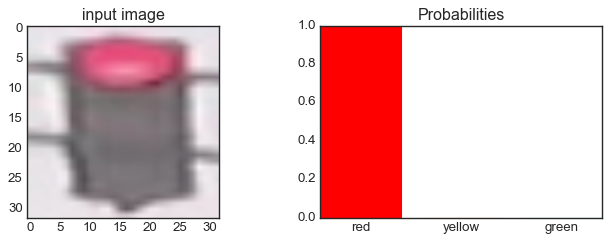

[1, 0, 0]

In [62]:
import random
image = random.choice( tlc.datasets.train.images_std.red )
model.predict(image, show_analysis = False, show_probabilities = True)

In [63]:
model.predict(image, show_analysis = False, show_probabilities = False)

[1, 0, 0]

In [64]:
estimate_label = model.predict

### Quick Test

Probability of image being red    = 1.000
Probability of image being yellow = 0.000
Probability of image being green  = 0.000
This image is 'RED'


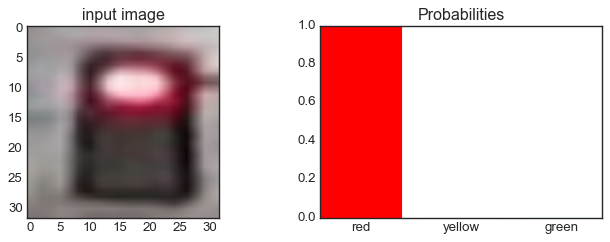

[1, 0, 0]

In [65]:
image = random.choice( tlc.datasets.train.images_std.red )
model.predict(image, show_analysis = False, show_probabilities = True)

Prediction Stage 1: Cropping image at model's optimal high saturation region for red, yellow, green light's position...
This procedure uses brightness features.


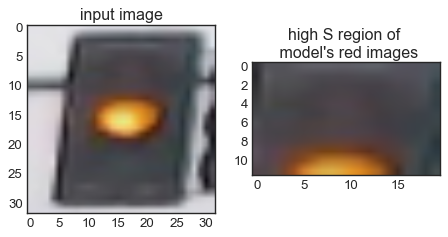

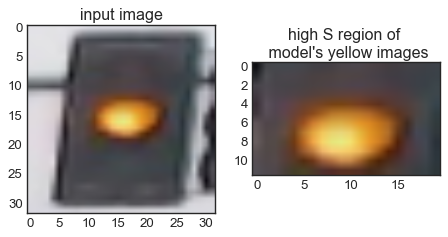

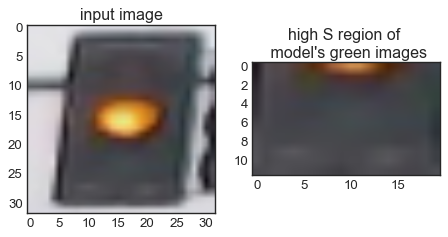

Done!

Prediction Stage 2: Locating light in model's optimal region of red, yellow, green light's region...
This procedure uses saturation and brightness features.


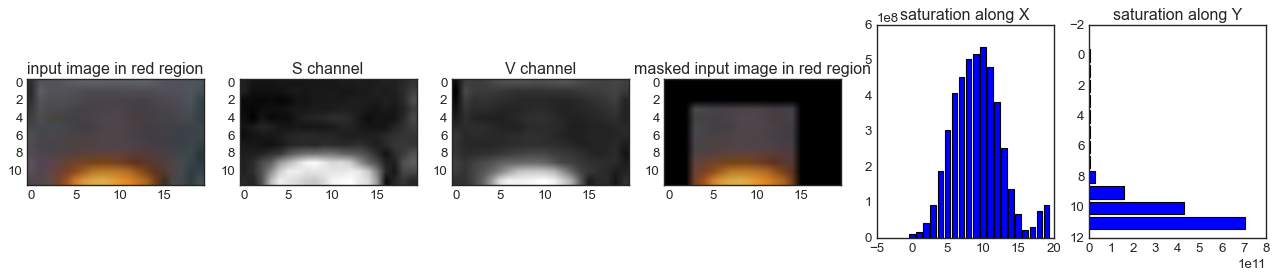

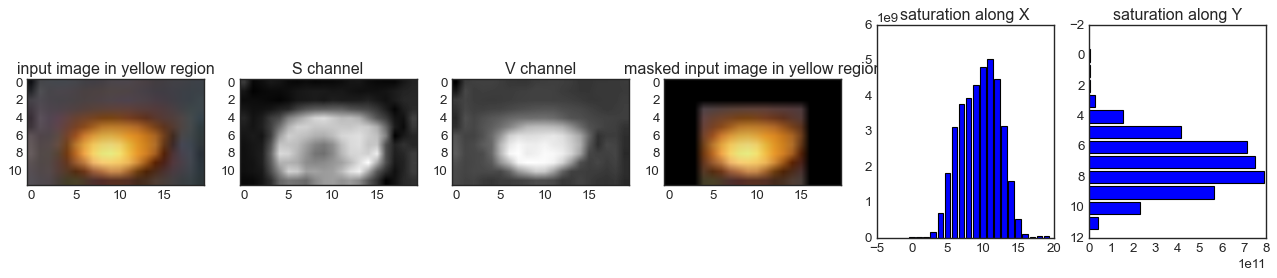

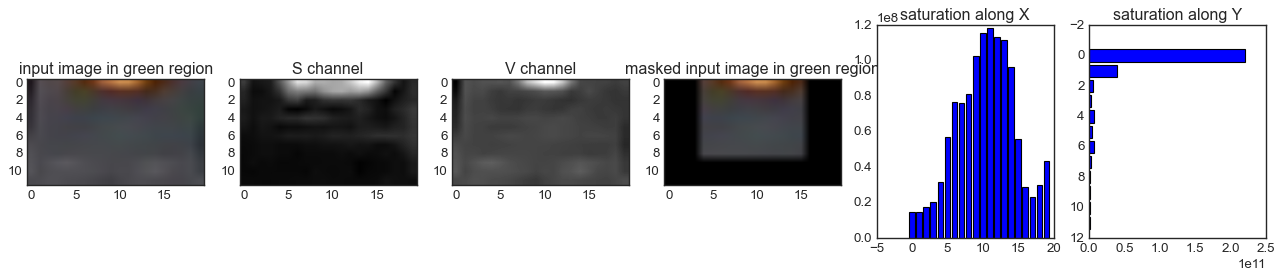

Done!

Prediction Stage 3: Cropping image at model's optimal region of red, yellow, green lights...
Done!

Prediction Stage 4: Extracting model's red, yellow, green light's colors from the respective cropped parts of the input image...


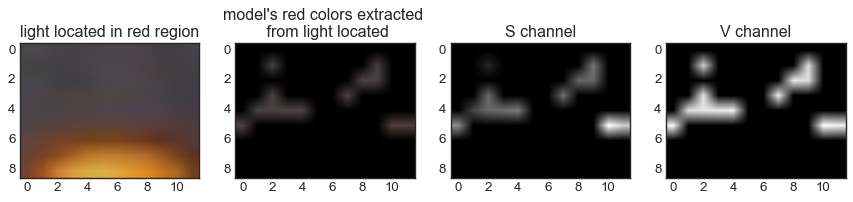

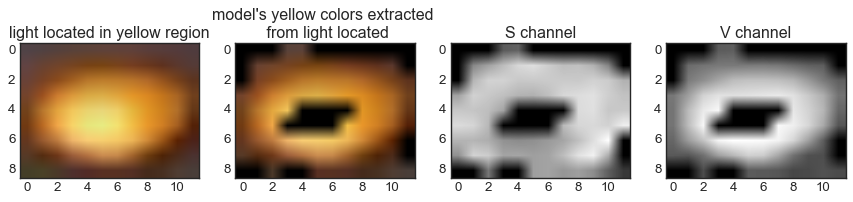

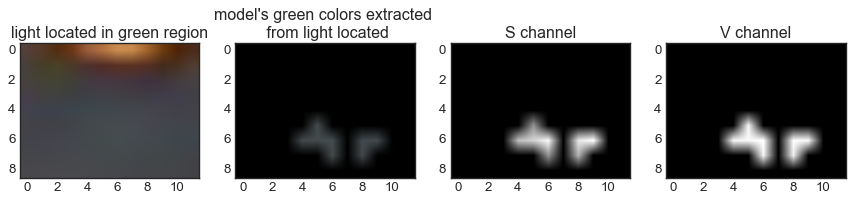

Done!

Prediction Stage 5a: Getting hues from the extracted colors at model's optimal region of red, yellow, green lights...
Distribution of hues at model's red    light region:     mu_hue_red    = 173.000,     sigma_hue_red    = 4.206
Distribution of hues at model's yellow light region:     mu_hue_yellow =  13.852,     sigma_hue_yellow = 3.642
Distribution of hues at model's green  light region:     mu_hue_green  =  98.875,     sigma_hue_green  = 2.088
Done!

Prediction Stage 5b: Getting saturations from the extracted colors at model's optimal region of red, yellow, green lights...
Distribution of saturations at model's red    light region:     mu_sat_red    =   4.352,     sigma_sat_red    = 12.973
Distribution of saturations at model's yellow light region:     mu_sat_yellow = 134.389,     sigma_sat_yellow = 83.169
Distribution of saturations at model's green  light region:     mu_sat_green  =   2.333,     sigma_sat_green  = 8.422
Done!

Prediction Stage 5c: Getting brightnesses from 

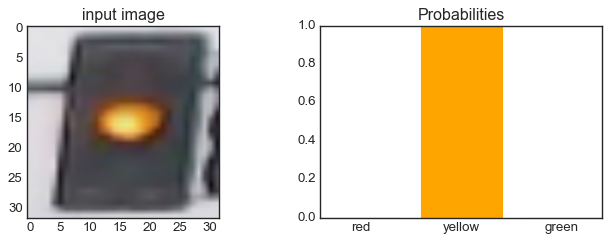

Done!



[0, 1, 0]

In [66]:
image = random.choice( tlc.datasets.train.images_std.yellow )
model.predict(image, show_analysis = True, show_probabilities = True)

Probability of image being red    = 0.000
Probability of image being yellow = 0.000
Probability of image being green  = 1.000
This image is 'GREEN'


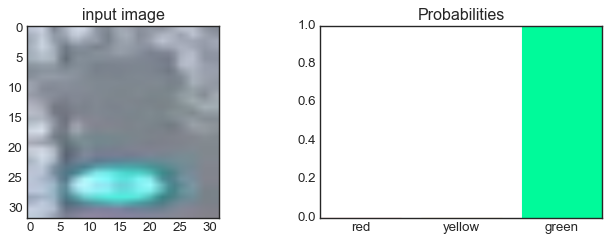

[0, 0, 1]

In [67]:
image = random.choice( tlc.datasets.train.images_std.green )
model.predict(image, show_analysis = False, show_probabilities = True)

## Testing on training Set

In [68]:
len(model.datasets.train.images_std.red)

723

In [69]:
pred_labels_red    = [ estimate_label(image) for image in tlc.datasets.train.images_std.red ]
pred_labels_yellow = [ estimate_label(image) for image in tlc.datasets.train.images_std.yellow ]
pred_labels_green  = [ estimate_label(image) for image in tlc.datasets.train.images_std.green ]

In [70]:
pred_red    = pred_labels_red.count([1,0,0])
pred_yellow = pred_labels_red.count([0,1,0])
pred_green  = pred_labels_red.count([0,0,1])
print(f"Total Red images: {len(tlc.datasets.train.images_std.red)}")
print( f"Pred Red    = {pred_red}" )
print( f"Pred Yellow = {pred_yellow}" )
print( f"Pred Green  = {pred_green}" )
accuracy = pred_red / (pred_red+pred_yellow+pred_green)
print(f"Accuracy: {accuracy*100:.2f}%")

Total Red images: 723
Pred Red    = 723
Pred Yellow = 0
Pred Green  = 0
Accuracy: 100.00%


In [71]:
pred_red    = pred_labels_yellow.count([1,0,0])
pred_yellow = pred_labels_yellow.count([0,1,0])
pred_green  = pred_labels_yellow.count([0,0,1])
print(f"Total Yellow images: {len(tlc.datasets.train.images_std.yellow)}")
print( f"Pred Red    = {pred_red}" )
print( f"Pred Yellow = {pred_yellow}" )
print( f"Pred Green  = {pred_green}" )
accuracy = pred_yellow / (pred_red+pred_yellow+pred_green)
print(f"Accuracy: {accuracy*100:.2f}%")

Total Yellow images: 35
Pred Red    = 2
Pred Yellow = 33
Pred Green  = 0
Accuracy: 94.29%


In [72]:
pred_red    = pred_labels_green.count([1,0,0])
pred_yellow = pred_labels_green.count([0,1,0])
pred_green  = pred_labels_green.count([0,0,1])
print(f"Total Green images: {len(tlc.datasets.train.images_std.green)}")
print( f"Pred Red    = {pred_red}" )
print( f"Pred Yellow = {pred_yellow}" )
print( f"Pred Green  = {pred_green}" )
accuracy = pred_green / (pred_red+pred_yellow+pred_green)
print(f"Accuracy: {accuracy*100:.2f}%")

Total Green images: 429
Pred Red    = 4
Pred Yellow = 0
Pred Green  = 425
Accuracy: 99.07%


# <span style="color:orange"> Checking Validating of our classifier: Tesing set </span>

In [73]:
# Load test data
TEST_IMAGE_LIST = tlc.helpers.load_dataset(IMAGE_DIR_TEST)

# Standardize the test data
STANDARDIZED_TEST_LIST = tlc.modify_images.standardize_images(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

In [74]:
# Constructs a list of misclassified images given a list of test images and their labels
# This will throw an AssertionError if labels are not standardized (one-hot encoded)

def get_misclassified_images(test_images):
    # Tracking misclassified images by placing them into a list >>
    misclassified_images_labels = []

    # Iterating through all the test images >>
    # Classifying each image and compare to the true label >>
    for image in test_images:

        # Get true data >>
        im = image[0]
        true_label = image[1]
        assert(len(true_label) == 3), "The true_label is not the expected length (3)."

        # Get predicted label from your classifier >>
        predicted_label = estimate_label(im)
        assert(len(predicted_label) == 3), "The predicted_label is not the expected length (3)."

        # Compare true and predicted labels >>
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified >>
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values >>
    return misclassified_images_labels


# Find all misclassified images in a given test set >>
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations >>
total       = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy    = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))


Accuracy: 0.9966329966329966
Number of misclassified images = 1 out of 297


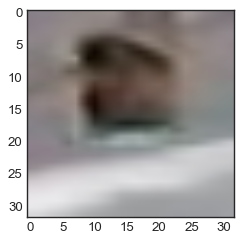

In [75]:
# Visualize misclassified example(s)
## TODO: Display an image in the `MISCLASSIFIED` list 
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified as
tlc.plots.plot_images(MISCLASSIFIED)

Prediction Stage 1: Cropping image at model's optimal high saturation region for red, yellow, green light's position...
This procedure uses brightness features.


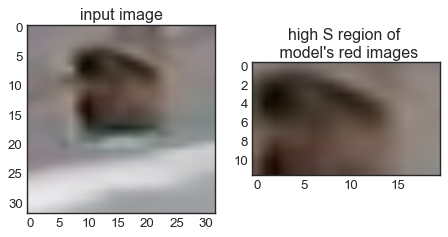

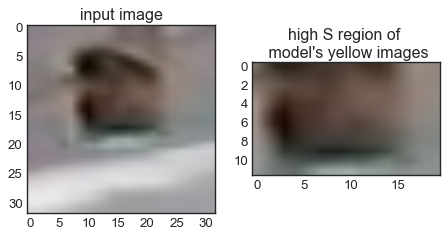

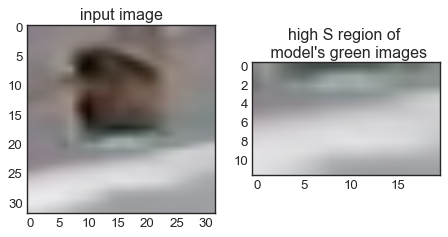

Done!

Prediction Stage 2: Locating light in model's optimal region of red, yellow, green light's region...
This procedure uses saturation and brightness features.


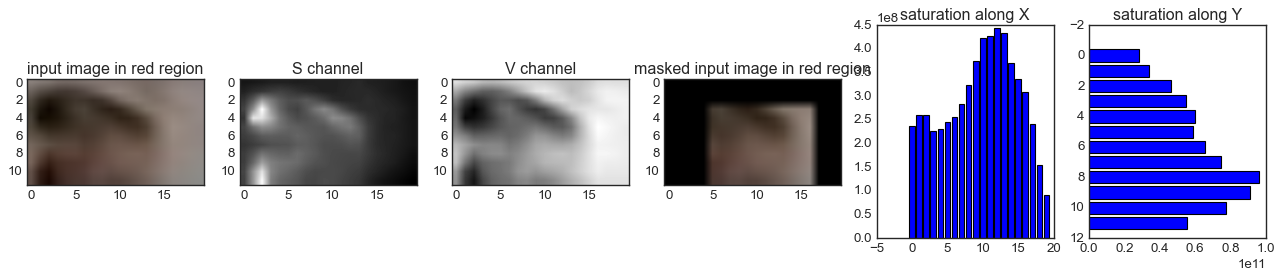

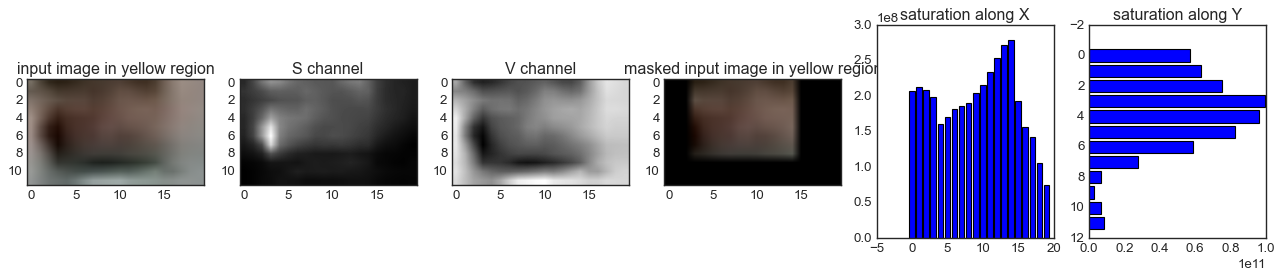

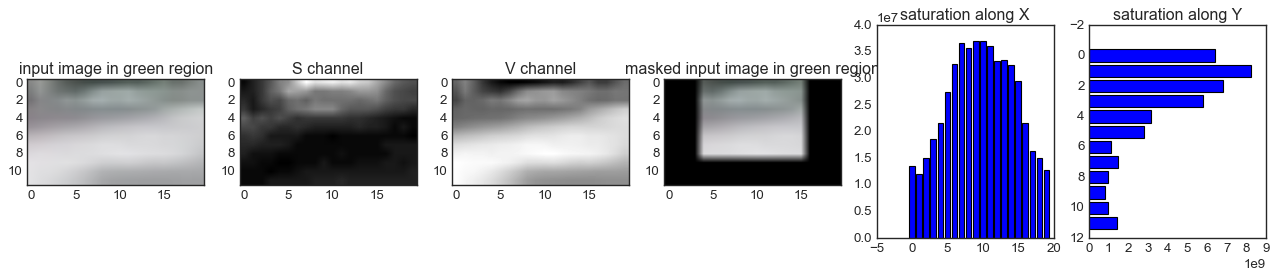

Done!

Prediction Stage 3: Cropping image at model's optimal region of red, yellow, green lights...
Done!

Prediction Stage 4: Extracting model's red, yellow, green light's colors from the respective cropped parts of the input image...


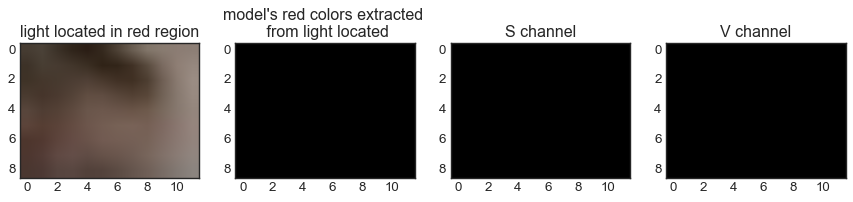

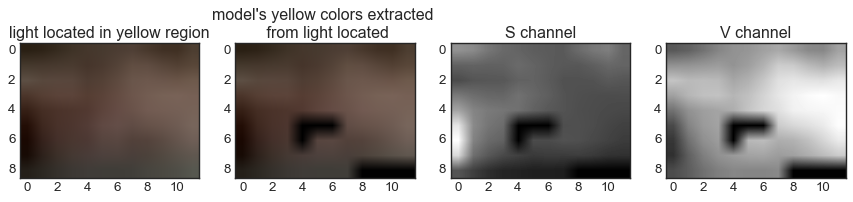

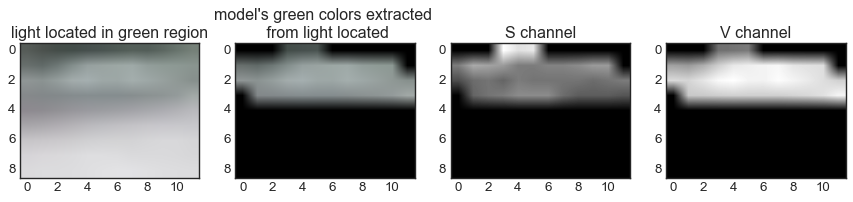

Done!

Prediction Stage 5a: Getting hues from the extracted colors at model's optimal region of red, yellow, green lights...
Distribution of hues at model's red    light region:     mu_hue_red    =   0.000,     sigma_hue_red    = 0.000
Distribution of hues at model's yellow light region:     mu_hue_yellow =  11.130,     sigma_hue_yellow = 3.081
Distribution of hues at model's green  light region:     mu_hue_green  =  86.892,     sigma_hue_green  = 5.954
Done!

Prediction Stage 5b: Getting saturations from the extracted colors at model's optimal region of red, yellow, green lights...
Distribution of saturations at model's red    light region:     mu_sat_red    =   0.000,     sigma_sat_red    = 0.000
Distribution of saturations at model's yellow light region:     mu_sat_yellow =  78.944,     sigma_sat_yellow = 38.387
Distribution of saturations at model's green  light region:     mu_sat_green  =   5.806,     sigma_sat_green  = 8.541
Done!

Prediction Stage 5c: Getting brightnesses from t

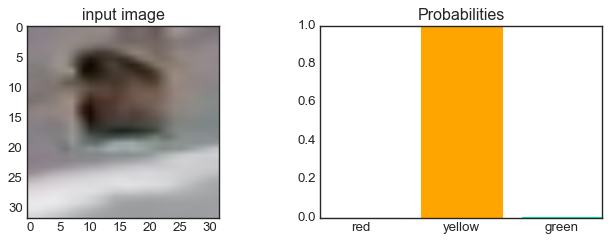

Done!



[0, 1, 0]

In [76]:
model.predict(MISCLASSIFIED[0][0], show_analysis = True )

#### Shashank Kumbhare
email: shashankkumbhare8@gmail.com  
phone: (682) 812-9211  
[LinkedIn](https://www.linkedin.com/in/shashank-kumbhare/)  

[View this project on GitHub](https://github.com/ShashankKumbhare/traffic-light-classifier)  
[Link to the implemented package code](https://github.com/ShashankKumbhare/traffic-light-classifier/tree/main/traffic_light_classifier)  

Prediction Stage 1: Cropping image at model's optimal high saturation region for red, yellow, green light's position...
This procedure uses brightness features.


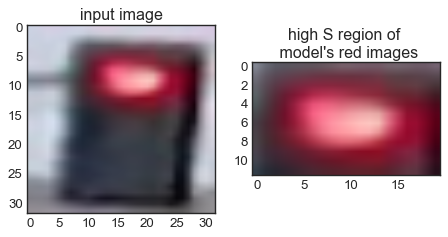

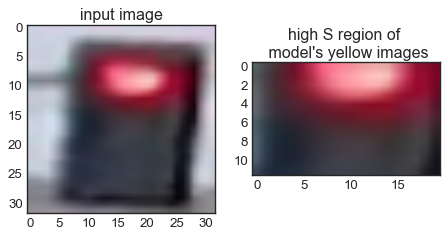

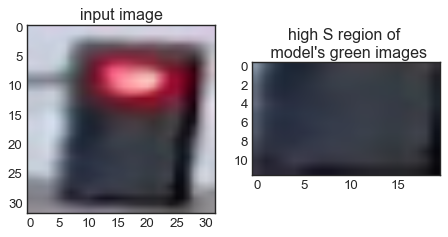

Done!

Prediction Stage 2: Locating light in model's optimal region of red, yellow, green light's region...
This procedure uses saturation and brightness features.


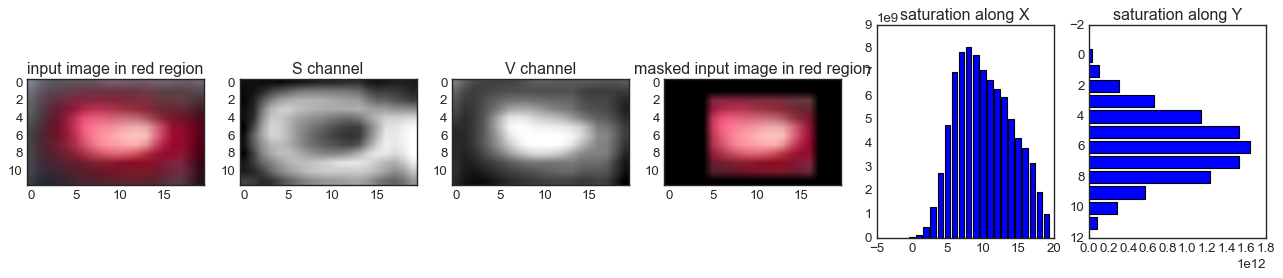

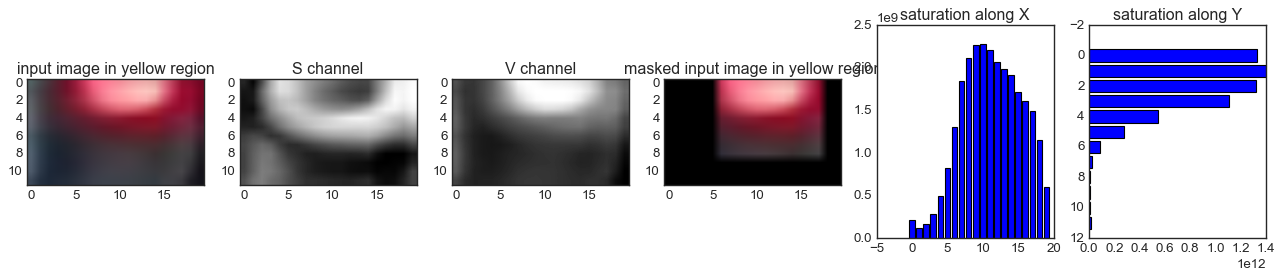

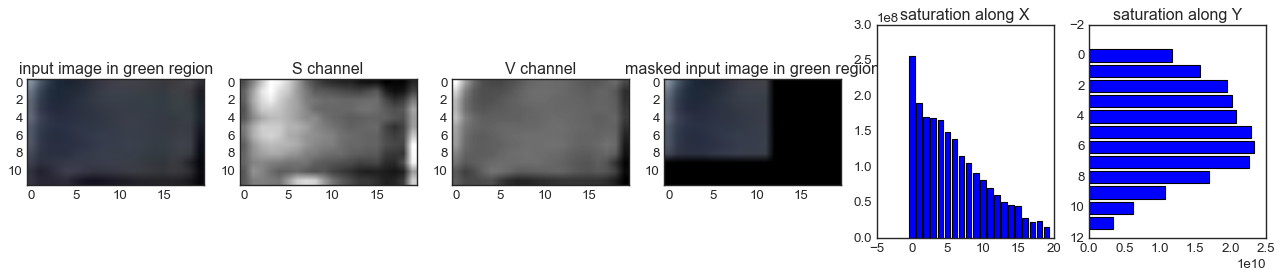

Done!

Prediction Stage 3: Cropping image at model's optimal region of red, yellow, green lights...
Done!

Prediction Stage 4: Extracting model's red, yellow, green light's colors from the respective cropped parts of the input image...


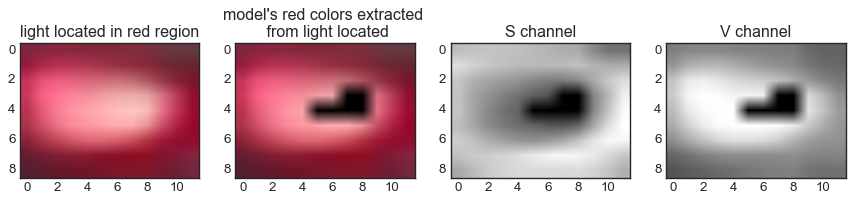

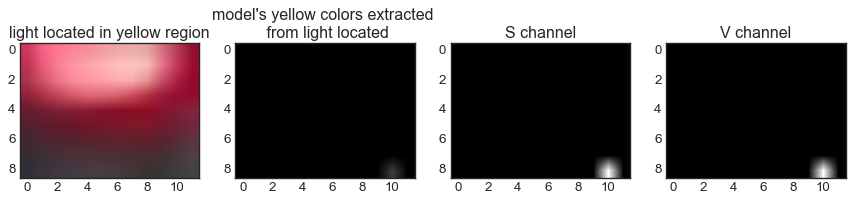

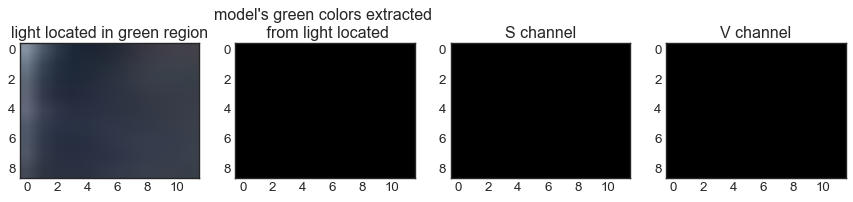

Done!

Prediction Stage 5a: Getting hues from the extracted colors at model's optimal region of red, yellow, green lights...
Distribution of hues at model's red    light region:     mu_hue_red    = 174.343,     sigma_hue_red    = 1.881
Distribution of hues at model's yellow light region:     mu_hue_yellow =  15.000,     sigma_hue_yellow = 0.000
Distribution of hues at model's green  light region:     mu_hue_green  =   0.000,     sigma_hue_green  = 0.000
Done!

Prediction Stage 5b: Getting saturations from the extracted colors at model's optimal region of red, yellow, green lights...
Distribution of saturations at model's red    light region:     mu_sat_red    = 157.787,     sigma_sat_red    = 54.149
Distribution of saturations at model's yellow light region:     mu_sat_yellow =   0.074,     sigma_sat_yellow = 0.766
Distribution of saturations at model's green  light region:     mu_sat_green  =   0.000,     sigma_sat_green  = 0.000
Done!

Prediction Stage 5c: Getting brightnesses from t

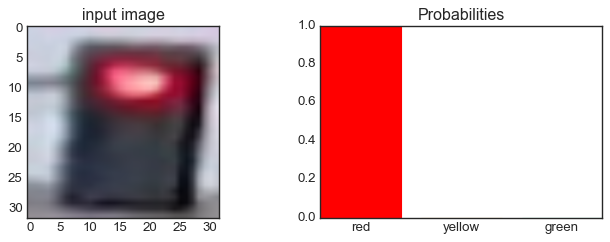

Done!



[1, 0, 0]

In [77]:
model.predict(model.compilation.stg9a_dataset_analysis_train.red[0].image_input, show_analysis = True)